In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

using StaticArrays, DifferentialEquations, DynamicalSystems, JLD2 
using CairoMakie
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
function output(idx, parameter, u0)
    println("index: $idx; αE: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [3]:
u0_start = SA[0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449];

In [11]:
tstep = 0.001;
time_transient = 3000; # transient time
time_lse = 1000; # time calculating LSE
integ_set = (alg = Vern9(), adaptive = true, abstol = 1e-15, reltol = 1e-15); # integrator setting
param = TM6_glial_ECM_get_params(); # parameters of model
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);


    τ - 1, τD - 2, τF - 3, τy - 4, α - 5, αE - 6, αecm - 7, αp - 8,
    J - 9, U0 - 10, I0 - 11, ΔU0 - 12, β - 13, βecm  -14, βp - 15,
    γp - 16, ecm0 - 17, ecm1 - 18, kecm - 19, θecm - 20, p0 - 21, p1 - 22, θp - 23, kp - 24, ythr - 25, xthr - 26


In [12]:
len = 250;
αE_range = range(0.067, 5.0, length = len);

In [16]:
Λs =  zeros(length(αE_range), 6);
u0s = zeros(length(αE_range), 6);

In [17]:
namefirst = "diagram ";
namelast = " alphaE $(len) autojac 1e-15"
format = ".jld2";

namefile_LSE = namefirst * "LSE" * namelast * format;
namefile_u0s = namefirst * "u0" * namelast * format;

In [19]:
for (index, αE) in enumerate(αE_range)

    if index == 1
        global u0 = u0_start
    end

    #output(index, αE, u0)

    param[6] = αE
    ds = CoupledODEs(TM6_glial_ECM,  u0, param, diffeq = integ_set)

    tr, _ = trajectory(ds, time_transient, Δt = tstep)
    u0 = tr[end]; ds = CoupledODEs(TM6_glial_ECM,  u0, param, diffeq = integ_set)
    #println("calc LSE");flush(stdout)
    Λ = lyapunovspectrum(ds, time_lse)
    Λs[index, :] = Λ
    u0s[index, :] = u0
    
    jldsave(namefile_LSE; Λs);
    jldsave(namefile_u0s; u0s);
    
    #output(Λs[index, :], u0s[index, :])
    #separate()
    
end

index: 1; αE: 0.067


u0: [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449]


calc LSE


Λ: [0.000513424441549009, -0.008325556337569933, -0.015608097343371234, -0.55555856762471, -0.8413613080781119, -8.217612371493066]


last point: [1.0365779842313367, 0.7836028909357463, 0.7217160686779132, 0.06434851657208966, 0.1514646966266747, 0.000933815237650848]


----------------


index: 2; αE: 0.08681124497991968


u0: [1.0365779842313367, 0.7836028909357463, 0.7217160686779132, 0.06434851657208966, 0.1514646966266747, 0.000933815237650848]


calc LSE


Λ: [-0.0036102969299863907, -0.008889008834419544, -0.014579155032150725, -0.5555600640239106, -0.8810349002221822, -8.226589190534781]


last point: [4.586097957621819, 0.438693256647819, 0.792232103133223, 0.06875171805909533, 0.12853438449439653, 0.005782711347662188]


----------------


index: 3; αE: 0.10662248995983936


u0: [4.586097957621819, 0.438693256647819, 0.792232103133223, 0.06875171805909533, 0.12853438449439653, 0.005782711347662188]


calc LSE


Λ: [-5.94969886262958e-5, -0.007873183095456588, -0.014597254495875798, -0.5555614247161748, -0.9053747102743355, -8.232744988695769]


last point: [1.5753874546601478, 0.8413434061927672, 0.6866736507642869, 0.06747228322532157, 0.11078545990867335, 0.010163888068714877]


----------------


index: 4; αE: 0.12643373493975904


u0: [1.5753874546601478, 0.8413434061927672, 0.6866736507642869, 0.06747228322532157, 0.11078545990867335, 0.010163888068714877]


calc LSE


Λ: [0.0033392967904221976, -0.008335661752789908, -0.016905715909846537, -0.5555640388674559, -0.9354531372576583, -8.235070378413536]


last point: [1.2598128671432867, 0.8230365271728355, 0.7032970683095595, 0.06320938787221461, 0.10048003293370611, 0.014709476474375259]


----------------


index: 5; αE: 0.14624497991967872


u0: [1.2598128671432867, 0.8230365271728355, 0.7032970683095595, 0.06320938787221461, 0.10048003293370611, 0.014709476474375259]


calc LSE


Λ: [-0.0015553376570207095, -0.009305887620588978, -0.014719460856593135, -0.5555649254636159, -0.9779363209958583, -8.237851734062287]


last point: [3.3688821594664518, 0.8260478457429274, 0.6731222192919825, 0.07079968124554847, 0.09532260805647351, 0.019115729436649225]


----------------


index: 6; αE: 0.1660562248995984


u0: [3.3688821594664518, 0.8260478457429274, 0.6731222192919825, 0.07079968124554847, 0.09532260805647351, 0.019115729436649225]


calc LSE


Λ: [0.0011936556113219387, -0.010238311222725859, -0.015120567244125041, -0.5555679971280891, -1.023471335536609, -8.239036779853311]


last point: [1.5253099912010692, 0.837436857620805, 0.6916025979038984, 0.06333537626648572, 0.0929679534539915, 0.023131851565052354]


----------------


index: 7; αE: 0.18586746987951808


u0: [1.5253099912010692, 0.837436857620805, 0.6916025979038984, 0.06333537626648572, 0.0929679534539915, 0.023131851565052354]


calc LSE


Λ: [0.0003859265041424352, -0.010715431503533556, -0.015639231633864978, -0.5555666535212619, -1.0696198056465829, -8.235976489473149]


last point: [1.113223073390032, 0.7974428213139247, 0.7181012228507309, 0.05822379244946797, 0.09182073980454872, 0.026656768820539304]


----------------


index: 8; αE: 0.20567871485943776


u0: [1.113223073390032, 0.7974428213139247, 0.7181012228507309, 0.05822379244946797, 0.09182073980454872, 0.026656768820539304]


calc LSE


Λ: [-0.004592645255154766, -0.009974563107837798, -0.016247649949049255, -0.5555675761389676, -1.115173150422622, -8.230096533463684]


last point: [24.31776385150914, 0.5567281064945216, 0.723715049476146, 0.06561849468973692, 0.0911140316230248, 0.029664890773069778]


----------------


index: 9; αE: 0.22548995983935743


u0: [24.31776385150914, 0.5567281064945216, 0.723715049476146, 0.06561849468973692, 0.0911140316230248, 0.029664890773069778]


calc LSE


Λ: [-0.00204304130776508, -0.010922247548017516, -0.015524731002457536, -0.5555680116326829, -1.1570610068175056, -8.224399822786832]


last point: [3.5285981234844086, 0.8222131754708358, 0.6784906634325705, 0.0646059894885598, 0.09080883470402061, 0.03243047237482359]


----------------


index: 10; αE: 0.2453012048192771


u0: [3.5285981234844086, 0.8222131754708358, 0.6784906634325705, 0.0646059894885598, 0.09080883470402061, 0.03243047237482359]


calc LSE


Λ: [-0.0005034895805384906, -0.011086027811297293, -0.01579739480585955, -0.5555701010191676, -1.1978449149171244, -8.212765632325807]


last point: [2.6387548209675673, 0.8316700949145753, 0.6813987656893444, 0.062282482435333145, 0.09064311535837966, 0.03491373929829659]


----------------


index: 11; αE: 0.2651124497991968


u0: [2.6387548209675673, 0.8316700949145753, 0.6813987656893444, 0.062282482435333145, 0.09064311535837966, 0.03491373929829659]


calc LSE


Λ: [-0.0011340722743660148, -0.011811156303176858, -0.016167935585202898, -0.5555691014582201, -1.236374314492827, -8.198210134846644]


last point: [1.0360430189072338, 0.7721959522875318, 0.7301787983161527, 0.05308564029569771, 0.09063945349718519, 0.03724170358869166]


----------------


index: 12; αE: 0.28492369477911644


u0: [1.0360430189072338, 0.7721959522875318, 0.7301787983161527, 0.05308564029569771, 0.09063945349718519, 0.03724170358869166]


calc LSE


Λ: [0.0014829365895850744, -0.011907311173021382, -0.016213991958844067, -0.5555717916029821, -1.2729900281859234, -8.185588551552845]


last point: [1.2172047389311442, 0.8087228416079899, 0.7144719405765566, 0.05281395463338018, 0.09059587056895801, 0.03930892435803811]


----------------


index: 13; αE: 0.30473493975903615


u0: [1.2172047389311442, 0.8087228416079899, 0.7144719405765566, 0.05281395463338018, 0.09059587056895801, 0.03930892435803811]


calc LSE


Λ: [0.002108766266853827, -0.011899784829996214, -0.015751697959175182, -0.5555721650009454, -1.307516108445254, -8.171908374395915]


last point: [3.3576057065025195, 0.8219643518667861, 0.6835596323510893, 0.05902657043225373, 0.09054512664819188, 0.04118956669538207]


----------------


index: 14; αE: 0.3245461847389558


u0: [3.3576057065025195, 0.8219643518667861, 0.6835596323510893, 0.05902657043225373, 0.09054512664819188, 0.04118956669538207]


calc LSE


Λ: [-0.0005749447550838293, -0.014027127672536272, -0.016310472772698068, -0.5555748937660411, -1.341141430927248, -8.151521827572404]


last point: [13.726983175278775, 0.34482641305804507, 0.8008244947935645, 0.05559512716653214, 0.0907833791375741, 0.043181988819360216]


----------------


index: 15; αE: 0.3443574297188755


u0: [13.726983175278775, 0.34482641305804507, 0.8008244947935645, 0.05559512716653214, 0.0907833791375741, 0.043181988819360216]


calc LSE


Λ: [0.0005569891446414528, -0.013817334434228501, -0.015445268974550954, -0.5555757141795417, -1.373371453993768, -8.133606583539839]


last point: [1.745722573270044, 0.5393455092544351, 0.7860727383026964, 0.051578273651376655, 0.09078823420470662, 0.044845484275509724]


----------------


index: 16; αE: 0.36416867469879516


u0: [1.745722573270044, 0.5393455092544351, 0.7860727383026964, 0.051578273651376655, 0.09078823420470662, 0.044845484275509724]


calc LSE


Λ: [-0.0021737212935508754, -0.01238104184088473, -0.01652314418436634, -0.5555720732960544, -1.4041590013939638, -8.113748716568557]


last point: [0.9535354042344326, 0.6741728871786241, 0.7605658249679426, 0.048851629634345854, 0.09081582922952484, 0.04642669815447715]


----------------


index: 17; αE: 0.38397991967871486


u0: [0.9535354042344326, 0.6741728871786241, 0.7605658249679426, 0.048851629634345854, 0.09081582922952484, 0.04642669815447715]


calc LSE


Λ: [0.00201486368240705, -0.01259761019696734, -0.016708679160444842, -0.5555789830239103, -1.4338542053189927, -8.093105254656237]


last point: [1.0719540955745614, 0.775235752006269, 0.7313532257304399, 0.04710700379980746, 0.090839880118707, 0.0479166540935343]


----------------


index: 18; αE: 0.4037911646586345


u0: [1.0719540955745614, 0.775235752006269, 0.7313532257304399, 0.04710700379980746, 0.090839880118707, 0.0479166540935343]


calc LSE


Λ: [-0.0027619525797774273, -0.012483500324541548, -0.016311328261688327, -0.5555722742735457, -1.4629328325939563, -8.07158985601854]


last point: [4.209441661456183, 0.8104595648770658, 0.6885722963600421, 0.05369245133239014, 0.09081357872652361, 0.04928405158688483]


----------------


index: 19; αE: 0.4236024096385542


u0: [4.209441661456183, 0.8104595648770658, 0.6885722963600421, 0.05369245133239014, 0.09081357872652361, 0.04928405158688483]


calc LSE


Λ: [0.003964630810691712, -0.012495608932195526, -0.01693507732095413, -0.5555730236477832, -1.4898850973740911, -8.04693362795748]


last point: [1.131423705244253, 0.7867658326844174, 0.7273058823392816, 0.04555000230121881, 0.09097056391910412, 0.05075236406782639]


----------------


index: 20; αE: 0.4434136546184739


u0: [1.131423705244253, 0.7867658326844174, 0.7273058823392816, 0.04555000230121881, 0.09097056391910412, 0.05075236406782639]


calc LSE


Λ: [-0.004167650696155269, -0.013969661694317804, -0.015430266470695186, -0.5555723011385263, -1.5174501994660614, -8.023065215166152]


last point: [14.762881467926794, 0.7006510570484895, 0.7043826940408472, 0.05186579551969387, 0.09093151980155274, 0.05198139889892767]


----------------


index: 21; αE: 0.4632248995983936


u0: [14.762881467926794, 0.7006510570484895, 0.7043826940408472, 0.05186579551969387, 0.09093151980155274, 0.05198139889892767]


calc LSE


Λ: [-0.0022470649640539504, -0.013906365098942034, -0.016464010623994687, -0.5555793868234491, -1.542547263326172, -7.99587635972676]


last point: [2.0981319283632898, 0.5138617858759364, 0.792789402757432, 0.04623041902162227, 0.09121076074629234, 0.053451240681880466]


----------------


index: 22; αE: 0.48303614457831323


u0: [2.0981319283632898, 0.5138617858759364, 0.792789402757432, 0.04623041902162227, 0.09121076074629234, 0.053451240681880466]


calc LSE


Λ: [-0.00016002677634732794, -0.014151577077669378, -0.015497337249916665, -0.5555789791702227, -1.5686512560568568, -7.972019269837215]


last point: [10.266998817074363, 0.7483827856633699, 0.6983394237641187, 0.05013839736601875, 0.09107743571206614, 0.05449225755071657]


----------------


index: 23; αE: 0.5028473895582329


u0: [10.266998817074363, 0.7483827856633699, 0.6983394237641187, 0.05013839736601875, 0.09107743571206614, 0.05449225755071657]


calc LSE


Λ: [0.00027818864874084155, -0.012832993951504171, -0.01710566944592354, -0.5555800096612288, -1.5924173561244852, -7.942390457984136]


last point: [1.6292371993896089, 0.5463122833934299, 0.7884645950937625, 0.04423521487868628, 0.09134576441686532, 0.05586254693154037]


----------------


index: 24; αE: 0.5226586345381526


u0: [1.6292371993896089, 0.5463122833934299, 0.7884645950937625, 0.04423521487868628, 0.09134576441686532, 0.05586254693154037]


calc LSE


Λ: [0.0023055401455981256, -0.012289063066910272, -0.017256649015770145, -0.555575534047772, -1.616126241784679, -7.915922871168014]


last point: [2.86279117645226, 0.8203485776243266, 0.6955550768978108, 0.04723732578477245, 0.09124182458023437, 0.056847835346216284]


----------------


index: 25; αE: 0.5424698795180722


u0: [2.86279117645226, 0.8203485776243266, 0.6955550768978108, 0.04723732578477245, 0.09124182458023437, 0.056847835346216284]


calc LSE


Λ: [-0.0025226465773515953, -0.01412796013786736, -0.013049958706868967, -0.5555805568430733, -1.642262432720474, -7.887627040704476]


last point: [28.653257809143195, 0.4767124944167102, 0.7535093704846896, 0.04658084418569621, 0.09136350756671556, 0.05800452038088945]


----------------


index: 26; αE: 0.562281124497992


u0: [28.653257809143195, 0.4767124944167102, 0.7535093704846896, 0.04658084418569621, 0.09136350756671556, 0.05800452038088945]


calc LSE


Λ: [-0.0007410585739302753, -0.01216190282372035, -0.017460037430439754, -0.5555640511166701, -1.6609508588078417, -7.854523271401796]


last point: [1.6838701489321228, 0.5411287736493428, 0.7904937262571398, 0.041983161011656354, 0.09155249436794609, 0.05919677330708995]


----------------


index: 27; αE: 0.5820923694779117


u0: [1.6838701489321228, 0.5411287736493428, 0.7904937262571398, 0.041983161011656354, 0.09155249436794609, 0.05919677330708995]


calc LSE


Λ: [-0.001860042011493656, -0.014027909840399894, -0.01719077330233571, -0.5555821934138478, -1.6832028998577215, -7.824487454710122]


last point: [2.6437921519255076, 0.4841621092962145, 0.7995912149182574, 0.04179948259909881, 0.09163339691079536, 0.060255122164419556]


----------------


index: 28; αE: 0.6019036144578314


u0: [2.6437921519255076, 0.4841621092962145, 0.7995912149182574, 0.04179948259909881, 0.09163339691079536, 0.060255122164419556]


calc LSE


Λ: [-0.00236387334222809, -0.01266157335808609, -0.01795947990108504, -0.5555740727782453, -1.7049172271305353, -7.793071784436539]


last point: [0.9769635722383233, 0.6698894654869338, 0.7660741578340414, 0.03925450906132702, 0.09164099524736612, 0.061216619063358346]


----------------


index: 29; αE: 0.621714859437751


u0: [0.9769635722383233, 0.6698894654869338, 0.7660741578340414, 0.03925450906132702, 0.09164099524736612, 0.061216619063358346]


calc LSE


Λ: [-0.0007536796939716961, -0.012445694075523983, -0.01800488822936575, -0.5555812195687624, -1.7260615378372433, -7.760954215914153]


last point: [1.0614109844703423, 0.6291421422191856, 0.7753569666163198, 0.03899849135698829, 0.0917176866222899, 0.062216664960322264]


----------------


index: 30; αE: 0.6415261044176707


u0: [1.0614109844703423, 0.6291421422191856, 0.7753569666163198, 0.03899849135698829, 0.0917176866222899, 0.062216664960322264]


calc LSE


Λ: [0.002785373909213274, -0.012624253422683156, -0.017959461953081585, -0.5555821533417133, -1.7467898995517055, -7.730336381017546]


last point: [1.6096687883700393, 0.8163280460640133, 0.71257927929056, 0.039777365444837745, 0.09165827475724386, 0.06306424470803597]


----------------


index: 31; αE: 0.6613373493975904


u0: [1.6096687883700393, 0.8163280460640133, 0.71257927929056, 0.039777365444837745, 0.09165827475724386, 0.06306424470803597]


calc LSE


Λ: [-0.0039646852447953775, -0.014969882516278692, -0.016692762693542022, -0.555582489838457, -1.7657002900057255, -7.6944835501308075]


last point: [17.21311979529811, 0.32759103954573016, 0.8075374382586155, 0.040969248951697346, 0.09194125479407693, 0.06421127509032773]


----------------


index: 32; αE: 0.6811485943775101


u0: [17.21311979529811, 0.32759103954573016, 0.8075374382586155, 0.040969248951697346, 0.09194125479407693, 0.06421127509032773]


calc LSE


Λ: [-0.002233846682958493, -0.013827180253381331, -0.016713026381043227, -0.5555792875428129, -1.7853435375075604, -7.660256215903817]


last point: [15.999591583584948, 0.3271774728655986, 0.8096230084548903, 0.04020719678530801, 0.09199801003617049, 0.06512405110594835]


----------------


index: 33; αE: 0.7009598393574297


u0: [15.999591583584948, 0.3271774728655986, 0.8096230084548903, 0.04020719678530801, 0.09199801003617049, 0.06512405110594835]


calc LSE


Λ: [-0.003074383739640537, -0.012610085797169778, -0.01830395270660712, -0.5555715156302938, -1.8048966081456754, -7.6255149316380155]


last point: [1.0168604902415088, 0.6488399779547673, 0.7724624654905803, 0.036257288583302155, 0.09194429651919075, 0.0659124082250948]


----------------


index: 34; αE: 0.7207710843373494


u0: [1.0168604902415088, 0.6488399779547673, 0.7724624654905803, 0.036257288583302155, 0.09194429651919075, 0.0659124082250948]


calc LSE


Λ: [0.003328141303485735, -0.012758827452070211, -0.018236600615852194, -0.5555865160430741, -1.8237386316017394, -7.592442870162242]


last point: [1.4728022189389585, 0.8076700740037329, 0.7196446231417479, 0.03656246930833825, 0.09189455321182201, 0.06668520062120983]


----------------


index: 35; αE: 0.7405823293172691


u0: [1.4728022189389585, 0.8076700740037329, 0.7196446231417479, 0.03656246930833825, 0.09189455321182201, 0.06668520062120983]


calc LSE


Λ: [0.004499064604381735, -0.012875521064280691, -0.018323798271321023, -0.5555872446894573, -1.8423886312381021, -7.555553421973695]


last point: [1.3266827865544313, 0.7968144176491007, 0.7263652270759701, 0.03528387503729109, 0.09196181065746174, 0.06755064564891884]


----------------


index: 36; αE: 0.7603935742971888


u0: [1.3266827865544313, 0.7968144176491007, 0.7263652270759701, 0.03528387503729109, 0.09196181065746174, 0.06755064564891884]


calc LSE


Λ: [-0.0015082413287221068, -0.015624233903871843, -0.012918142316949856, -0.5555835298580517, -1.8633739782515826, -7.520284685651709]


last point: [29.379985594480672, 0.48195665378284497, 0.7571698152532681, 0.03867932245887871, 0.09200165396462347, 0.06837028609521964]


----------------


index: 37; αE: 0.7802048192771084


u0: [29.379985594480672, 0.48195665378284497, 0.7571698152532681, 0.03867932245887871, 0.09200165396462347, 0.06837028609521964]


calc LSE


Λ: [-0.0003849420636962353, -0.012881229952523977, -0.01852446767586067, -0.5555833734427068, -1.8775818889618974, -7.481569069374464]


last point: [1.0223443457136137, 0.649863681938602, 0.7734533225997655, 0.03392288889420141, 0.09215565178866555, 0.06928788464843653]


----------------


index: 38; αE: 0.8000160642570281


u0: [1.0223443457136137, 0.649863681938602, 0.7734533225997655, 0.03392288889420141, 0.09215565178866555, 0.06928788464843653]


calc LSE


Λ: [0.00039326665073384303, -0.012916948016604238, -0.018485279045161205, -0.5555792702157222, -1.8952257128556327, -7.4445313226223835]


last point: [1.2957071886519222, 0.7908892192261897, 0.7299880441883254, 0.03345028533425061, 0.09211831367629866, 0.07000582694384451]


----------------


index: 39; αE: 0.8198273092369478


u0: [1.2957071886519222, 0.7908892192261897, 0.7299880441883254, 0.03345028533425061, 0.09211831367629866, 0.07000582694384451]


calc LSE


Λ: [-0.002259153693929866, -0.012910755596713414, -0.01862806358076652, -0.5555711668560283, -1.9122693629484075, -7.404006885847314]


last point: [0.994329606679779, 0.6772408772877917, 0.7676669206350236, 0.032604422792336184, 0.0922423877617728, 0.07086248529296874]


----------------


index: 40; αE: 0.8396385542168675


u0: [0.994329606679779, 0.6772408772877917, 0.7676669206350236, 0.032604422792336184, 0.0922423877617728, 0.07086248529296874]


calc LSE


Λ: [0.0014745609277392992, -0.013186104036933847, -0.01863365230551733, -0.5555842753079107, -1.9294960315241625, -7.365596397910649]


last point: [1.0787145608776405, 0.7487000373515855, 0.7475579314486308, 0.03174991259026195, 0.09224982238275013, 0.07159447603132811]


----------------


index: 41; αE: 0.8594497991967871


u0: [1.0787145608776405, 0.7487000373515855, 0.7475579314486308, 0.03174991259026195, 0.09224982238275013, 0.07159447603132811]


calc LSE


Λ: [0.00032623055901286833, -0.01287279673475655, -0.01852677581570153, -0.5555811474980351, -1.9456745956779096, -7.327349408806589]


last point: [1.7062010204137297, 0.8092705476314269, 0.71845588071006, 0.03339112195389535, 0.09222736883008012, 0.07228470701420847]


----------------


index: 42; αE: 0.8792610441767068


u0: [1.7062010204137297, 0.8092705476314269, 0.71845588071006, 0.03339112195389535, 0.09222736883008012, 0.07228470701420847]


calc LSE


Λ: [0.0024843350846066015, -0.012937730557224428, -0.018524024504277266, -0.5555851813268248, -1.9624368212486356, -7.287211342710343]


last point: [1.9924866730682556, 0.8116923779452047, 0.7148317381086213, 0.03357544702879645, 0.09226016037118308, 0.07301484402906218]


----------------


index: 43; αE: 0.8990722891566265


u0: [1.9924866730682556, 0.8116923779452047, 0.7148317381086213, 0.03357544702879645, 0.09226016037118308, 0.07301484402906218]


calc LSE


Λ: [0.0026507085207117054, -0.013066785848288518, -0.01879222294746328, -0.5555790765911087, -1.977746478604677, -7.244558694812502]


last point: [1.011442284975721, 0.6668003634518671, 0.7712677410405249, 0.030639097028578966, 0.092430946919797, 0.07386444974632324]
----------------


index: 44; αE: 0.9188835341365462


u0: [1.011442284975721, 0.6668003634518671, 0.7712677410405249, 0.030639097028578966, 0.092430946919797, 0.07386444974632324]


calc LSE


Λ: [0.0001372204308059505, -0.01331636977171492, -0.01879964868756607, -0.555583872677883, -1.99401817556775, -7.202048305362261]


last point: [1.0522016310742752, 0.7327556144923333, 0.7537256997240732, 0.029788139909741482, 0.09243875797243524, 0.07454715349925932]


----------------


index: 45; αE: 0.9386947791164658


u0: [1.0522016310742752, 0.7327556144923333, 0.7537256997240732, 0.029788139909741482, 0.09243875797243524, 0.07454715349925932]


calc LSE


Λ: [0.0012872303826503351, -0.013192699395024217, -0.01838117357154139, -0.5555882694351846, -2.0092289290323997, -7.162160515054667]


last point: [4.472141662459855, 0.7945697992987709, 0.7098628183966407, 0.03366524432104542, 0.09235740676553036, 0.07513351642769035]


----------------


index: 46; αE: 0.9585060240963855


u0: [4.472141662459855, 0.7945697992987709, 0.7098628183966407, 0.03366524432104542, 0.09235740676553036, 0.07513351642769035]


calc LSE


Λ: [2.893584343625529e-5, -0.013998234499430376, -0.018572318638948152, -0.5555858099390625, -2.0243207616272607, -7.117602238676352]


last point: [4.045135876226239, 0.4293262225402724, 0.8134049725131424, 0.03089147293222442, 0.09264472274259879, 0.07606121954449091]


----------------


index: 47; αE: 0.9783172690763052


u0: [4.045135876226239, 0.4293262225402724, 0.8134049725131424, 0.03089147293222442, 0.09264472274259879, 0.07606121954449091]


calc LSE


Λ: [-0.0010859204622326866, -0.013353190451219786, -0.018934311016054837, -0.5555831913494301, -2.039718332565599, -7.072976723175975]


last point: [1.0221453511410936, 0.6659435513566041, 0.7725208998159161, 0.02873962463382414, 0.09260004930820412, 0.07666173339230188]


----------------


index: 48; αE: 0.9981285140562249


u0: [1.0221453511410936, 0.6659435513566041, 0.7725208998159161, 0.02873962463382414, 0.09260004930820412, 0.07666173339230188]


calc LSE


Λ: [-5.764651228328365e-5, -0.012820588575650958, -0.018952151873697577, -0.5555860482804286, -2.0542791185761327, -7.030249628871371]


last point: [1.3326845327426393, 0.5795173416920599, 0.7908327510010323, 0.028898165756134735, 0.09267593910762517, 0.07736746325950646]


----------------


index: 49; αE: 1.0179397590361445


u0: [1.3326845327426393, 0.5795173416920599, 0.7908327510010323, 0.028898165756134735, 0.09267593910762517, 0.07736746325950646]


calc LSE


Λ: [-0.0024752256990119128, -0.012672556821309678, -0.018729730897264648, -0.5555653098401747, -2.0692196728497447, -6.985056763776379]


last point: [2.171100924825346, 0.8069515033672046, 0.7178517412241449, 0.03023857180970202, 0.09254750579123087, 0.07786822427836201]


----------------


index: 50; αE: 1.0377510040160642


u0: [2.171100924825346, 0.8069515033672046, 0.7178517412241449, 0.03023857180970202, 0.09254750579123087, 0.07786822427836201]


calc LSE


Λ: [0.00382025191096367, -0.013413167432948096, -0.018965499380660545, -0.5555857982026656, -2.0833730697758135, -6.941189980028581]


last point: [1.1247221413663933, 0.7491862230534055, 0.7496265039137925, 0.027130909695449738, 0.0926675673510006, 0.07859753786613981]


----------------


index: 51; αE: 1.057562248995984


u0: [1.1247221413663933, 0.7491862230534055, 0.7496265039137925, 0.027130909695449738, 0.0926675673510006, 0.07859753786613981]


calc LSE


Λ: [0.0041421746293863705, -0.01344754958487732, -0.018989991305185555, -0.5555896184487159, -2.097165180564971, -6.894556587169691]


last point: [1.1363981504246154, 0.7509494868262041, 0.7492086348775646, 0.0267212210098356, 0.09270347797560327, 0.07923742403580128]


----------------


index: 52; αE: 1.0773734939759037


u0: [1.1363981504246154, 0.7509494868262041, 0.7492086348775646, 0.0267212210098356, 0.09270347797560327, 0.07923742403580128]


calc LSE


Λ: [-0.0009232707350963253, -0.013119761617404316, -0.018954098327175383, -0.5555696642778128, -2.1112891568156478, -6.847644933957102]


last point: [1.3268863870779988, 0.7803358366307762, 0.7374552391831206, 0.02678813095059661, 0.09271154223755922, 0.07984203916272092]


----------------


index: 53; αE: 1.0971847389558234


u0: [1.3268863870779988, 0.7803358366307762, 0.7374552391831206, 0.02678813095059661, 0.09271154223755922, 0.07984203916272092]


calc LSE


Λ: [0.0003523869942321597, -0.01342625214074501, -0.018986859966457093, -0.5555843457629835, -2.125574727352868, -6.799806999828211]


last point: [1.3457168067535468, 0.7811704783839005, 0.7372021042093604, 0.026419116036909336, 0.09274611160233573, 0.0804637422418078]


----------------


index: 54; αE: 1.116995983935743


u0: [1.3457168067535468, 0.7811704783839005, 0.7372021042093604, 0.026419116036909336, 0.09274611160233573, 0.0804637422418078]


calc LSE


Λ: [-0.0018216293604901921, -0.013285444571558927, -0.01911626151060101, -0.5555688155810742, -2.1384621152221452, -6.7518380310863275]


last point: [1.0343533252563992, 0.6765074888025399, 0.7716801722839408, 0.025634496929348893, 0.09285957714389556, 0.08115307704111148]


----------------


index: 55; αE: 1.1368072289156625


u0: [1.0343533252563992, 0.6765074888025399, 0.7716801722839408, 0.025634496929348893, 0.09285957714389556, 0.08115307704111148]


calc LSE


Λ: [-0.0037635628114486694, -0.01461582531130453, -0.017530410288792927, -0.5555764141593943, -2.152258030607065, -6.70555190556119]


last point: [23.938033658560308, 0.5951503732323341, 0.7421763613457657, 0.028732979673058667, 0.09270114502024535, 0.08157369304248813]


----------------


index: 56; αE: 1.1566184738955823


u0: [23.938033658560308, 0.5951503732323341, 0.7421763613457657, 0.028732979673058667, 0.09270114502024535, 0.08157369304248813]


calc LSE


Λ: [-0.00318908358316273, -0.015558042506525323, -0.014212306261073225, -0.5555860403939556, -2.168209960874989, -6.65513967381737]


last point: [31.487120172940948, 0.43598946787947424, 0.775274393171332, 0.027966841262913444, 0.09289284576549081, 0.08232275162883486]


----------------


index: 57; αE: 1.176429718875502


u0: [31.487120172940948, 0.43598946787947424, 0.775274393171332, 0.027966841262913444, 0.09289284576549081, 0.08232275162883486]


calc LSE


Λ: [0.0017483808738442568, -0.013707661055268602, -0.019197502433041896, -0.5555873395492051, -2.178530277665793, -6.604877548309915]


last point: [1.0423987276644426, 0.68621884971823, 0.7699120160911179, 0.024382231572026992, 0.09295776421476333, 0.08294305260350175]


----------------


index: 58; αE: 1.1962409638554217


u0: [1.0423987276644426, 0.68621884971823, 0.7699120160911179, 0.024382231572026992, 0.09295776421476333, 0.08294305260350175]


calc LSE


Λ: [-0.003815612334930478, -0.01255991543389092, -0.01920890869498698, -0.5555739356094315, -2.190767057979482, -6.55366555002292]


last point: [1.7718315633884079, 0.5335670825100568, 0.8016271001733254, 0.024882749924520425, 0.09305845421706545, 0.08359042115891081]


----------------


index: 59; αE: 1.2160522088353414
u0: [1.7718315633884079, 0.5335670825100568, 0.8016271001733254, 0.024882749924520425, 0.09305845421706545, 0.08359042115891081]


calc LSE


Λ: [0.0021750222739825033, -0.013437044313215414, -0.019253891501261375, -0.5555792697431611, -2.203726685332134, -6.502641037482652]


last point: [1.1752964529249976, 0.6142733392152684, 0.7868722956580461, 0.02401453887973936, 0.09305943223558265, 0.08413514589958826]


----------------


index: 60; αE: 1.235863453815261


u0: [1.1752964529249976, 0.6142733392152684, 0.7868722956580461, 0.02401453887973936, 0.09305943223558265, 0.08413514589958826]


calc LSE


Λ: [0.0007031509416667299, -0.013533322256772432, -0.019162566354787317, -0.5555792642123967, -2.2162148448727024, -6.451636195673402]


last point: [1.265742341684899, 0.764656789241258, 0.745619247515339, 0.023389678952402713, 0.0929976277295425, 0.084612738061852]


----------------


index: 61; αE: 1.2556746987951808


u0: [1.265742341684899, 0.764656789241258, 0.745619247515339, 0.023389678952402713, 0.0929976277295425, 0.084612738061852]


calc LSE


Λ: [-0.004110381134312693, -0.016186741737690854, -0.016221717070786113, -0.5555719485983636, -2.228949982370354, -6.399400795713666]


last point: [18.233615114037214, 0.6606463224735984, 0.7338451783874937, 0.026203429148931884, 0.09290850183579695, 0.0850573072357351]


----------------


index: 62; αE: 1.2754859437751005


u0: [18.233615114037214, 0.6606463224735984, 0.7338451783874937, 0.026203429148931884, 0.09290850183579695, 0.0850573072357351]


calc LSE


Λ: [6.534854107416873e-5, -0.013647861242168373, -0.019153100092920965, -0.5555872231272503, -2.2407808028509035, -6.344651685693477]


last point: [4.894870921806298, 0.4036434419174563, 0.8211372098273381, 0.02401997850474521, 0.09323645442324509, 0.0858967487825863]


----------------


index: 63; αE: 1.29529718875502


u0: [4.894870921806298, 0.4036434419174563, 0.8211372098273381, 0.02401997850474521, 0.09323645442324509, 0.0858967487825863]


calc LSE


Λ: [-0.0017421820431161143, -0.013534767750768282, -0.01933569321520114, -0.5555747572317209, -2.2525328606379498, -6.2905242970752635]


last point: [1.221297966563114, 0.6061576917925481, 0.7894746536031786, 0.022547118003098023, 0.09319018390130913, 0.0863700687085227]


----------------


index: 64; αE: 1.3151084337349397


u0: [1.221297966563114, 0.6061576917925481, 0.7894746536031786, 0.022547118003098023, 0.09319018390130913, 0.0863700687085227]


calc LSE


Λ: [-0.0003739693788040639, -0.01369404834208963, -0.019354080423006497, -0.5555794650595325, -2.2643358677326906, -6.2358744278624885]


last point: [1.1335347400482085, 0.6315881890421758, 0.7843828548560912, 0.02204223557382971, 0.09320915622516841, 0.08689998017403033]


----------------


index: 65; αE: 1.3349196787148594


u0: [1.1335347400482085, 0.6315881890421758, 0.7843828548560912, 0.02204223557382971, 0.09320915622516841, 0.08689998017403033]


calc LSE


Λ: [-0.0020554264212799224, -0.011508066149586247, -0.01923995381614354, -0.55555757004133, -2.2760666408881147, -6.178440883190799]


last point: [3.9298496434737853, 0.4288502790381723, 0.8189818803810924, 0.022732984834970785, 0.09332028625934675, 0.08751259119655494]


----------------


index: 66; αE: 1.354730923694779


u0: [3.9298496434737853, 0.4288502790381723, 0.8189818803810924, 0.022732984834970785, 0.09332028625934675, 0.08751259119655494]


calc LSE


Λ: [-0.0008109395917178199, -0.013476256151854611, -0.019150964348438937, -0.5555744870797257, -2.2878730025813088, -6.124590456784507]


last point: [1.975941915628787, 0.7927954071872074, 0.7303870865086858, 0.02261875928233741, 0.09313122895099614, 0.08783039763515958]


----------------


index: 67; αE: 1.3745421686746988


u0: [1.975941915628787, 0.7927954071872074, 0.7303870865086858, 0.02261875928233741, 0.09313122895099614, 0.08783039763515958]


calc LSE


Λ: [0.00031422329399699085, -0.014291198714173248, -0.01652896558307426, -0.555590641572312, -2.301444211401941, -6.067397639785706]


last point: [27.050302624364782, 0.5541984465098198, 0.7544542995953512, 0.023588814923988233, 0.09310332628946075, 0.08829183892530973]


----------------


index: 68; αE: 1.3943534136546185


u0: [27.050302624364782, 0.5541984465098198, 0.7544542995953512, 0.023588814923988233, 0.09310332628946075, 0.08829183892530973]


calc LSE


Λ: [0.0009281628424962998, -0.013746048320421747, -0.01918368145593079, -0.5555891390289884, -2.3108498182353623, -6.009170036508147]


last point: [2.2275966007871904, 0.7926858013154365, 0.7292638891720685, 0.02216127436345485, 0.09318200495578755, 0.08886189707587039]


----------------


index: 69; αE: 1.4141646586345382


u0: [2.2275966007871904, 0.7926858013154365, 0.7292638891720685, 0.02216127436345485, 0.09318200495578755, 0.08886189707587039]


calc LSE


Λ: [-0.001440648075997922, -0.0134767960460996, -0.019280649794563554, -0.5555836814108881, -2.3205791866951135, -5.949082150105679]


last point: [6.017162654766264, 0.37917194596311726, 0.8255968265845844, 0.021516348456542517, 0.0934584529173797, 0.08961133058828723]


----------------


index: 70; αE: 1.433975903614458


u0: [6.017162654766264, 0.37917194596311726, 0.8255968265845844, 0.021516348456542517, 0.0934584529173797, 0.08961133058828723]


calc LSE


Λ: [-9.276673265346109e-5, -0.013806354179695477, -0.019173617544883656, -0.5555772005985792, -2.3316578065112683, -5.888914313400551]


last point: [8.237755434998908, 0.3477129804778218, 0.828259890040228, 0.021329608410851582, 0.09350107692898635, 0.09013009403582374]


----------------


index: 71; αE: 1.4537871485943774


u0: [8.237755434998908, 0.3477129804778218, 0.828259890040228, 0.021329608410851582, 0.09350107692898635, 0.09013009403582374]


calc LSE


Λ: [0.0012770980331140583, -0.013771700385383364, -0.0193407560201494, -0.5555798673417461, -2.3424103752061893, -5.8302113066858485]


last point: [1.3613592914708843, 0.7637160520925437, 0.747581166372366, 0.01967417702905517, 0.09331840712966993, 0.09042642940771001]


----------------


index: 72; αE: 1.4735983935742971


u0: [1.3613592914708843, 0.7637160520925437, 0.747581166372366, 0.01967417702905517, 0.09331840712966993, 0.09042642940771001]


calc LSE


Λ: [0.004232347718464203, -0.013922424191707071, -0.01936406374458762, -0.5555922289911729, -2.3528658064217502, -5.768366634980389]


last point: [1.4208422726527694, 0.7680818758388261, 0.7457518816079035, 0.019460194042353086, 0.09333982207650882, 0.09091423112842201]


----------------


index: 73; αE: 1.4934096385542168


u0: [1.4208422726527694, 0.7680818758388261, 0.7457518816079035, 0.019460194042353086, 0.09333982207650882, 0.09091423112842201]


calc LSE


Λ: [-0.005553049712305463, -0.012278178244644819, -0.019339126197727766, -0.5555600478077236, -2.3628568234066547, -5.704066914372182]


last point: [5.91659238300686, 0.3800981950257484, 0.826608040405254, 0.02009141667217493, 0.09357134083659294, 0.09159955913140687]


----------------


index: 74; αE: 1.5132208835341365


u0: [5.91659238300686, 0.3800981950257484, 0.826608040405254, 0.02009141667217493, 0.09357134083659294, 0.09159955913140687]


calc LSE


Λ: [-0.006320702335414061, -0.011272541500865114, -0.019404821076409194, -0.5555597693497349, -2.372808178008552, -5.641016018342704]


last point: [4.891957538769923, 0.40142722857448443, 0.8246362797508385, 0.01964517985560828, 0.09359013116890458, 0.09207472720533424]


----------------


index: 75; αE: 1.5330321285140562


u0: [4.891957538769923, 0.40142722857448443, 0.8246362797508385, 0.01964517985560828, 0.09359013116890458, 0.09207472720533424]


calc LSE


Λ: [-0.0002267383604258929, -0.013865132774261522, -0.019340945119845965, -0.555582688981815, -2.383380771785913, -5.578267414865633]


last point: [1.8325762671368757, 0.78281035858762, 0.7376800456072015, 0.019171476910056367, 0.09339282512008677, 0.0923363585948563]


----------------


index: 76; αE: 1.552843373493976


u0: [1.8325762671368757, 0.78281035858762, 0.7376800456072015, 0.019171476910056367, 0.09339282512008677, 0.0923363585948563]


calc LSE


Λ: [-0.0004446875964329943, -0.013718601178768478, -0.019273203733297713, -0.5555767697973552, -2.3922033846571567, -5.514663431910921]


last point: [2.426766624181027, 0.7865276933257862, 0.732759705076967, 0.019429211561069103, 0.093400097004722, 0.09279043276145872]


----------------


index: 77; αE: 1.5726546184738956


u0: [2.426766624181027, 0.7865276933257862, 0.732759705076967, 0.019429211561069103, 0.093400097004722, 0.09279043276145872]


calc LSE


Λ: [-0.0005309097128089628, -0.014090777825676552, -0.019618346542144154, -0.555588899847777, -2.4016290001490255, -5.4467962737731]


last point: [1.5117125580129267, 0.5666314370819615, 0.800306025545348, 0.017939158790944577, 0.09360392739971013, 0.09342950016265067]


----------------


index: 78; αE: 1.5924658634538154


u0: [1.5117125580129267, 0.5666314370819615, 0.800306025545348, 0.017939158790944577, 0.09360392739971013, 0.09342950016265067]


calc LSE


Λ: [0.0013270648691262794, -0.014056676313679482, -0.019538922013696742, -0.5555792229824832, -2.4100465831709017, -5.381160926179297]


last point: [1.1313244384001566, 0.6920693662584706, 0.7726077024994371, 0.017144308052406868, 0.09356358262916425, 0.09382796247113974]


----------------


index: 79; αE: 1.6122771084337348


u0: [1.1313244384001566, 0.6920693662584706, 0.7726077024994371, 0.017144308052406868, 0.09356358262916425, 0.09382796247113974]


calc LSE


Λ: [-0.0026081425324894175, -0.013394681915310791, -0.019603942320317768, -0.555572033484611, -2.418488490286182, -5.312595565313034]


last point: [2.5722599361527165, 0.48325527413115477, 0.8148607462760851, 0.017638628775979853, 0.09369089355766967, 0.09438350890375907]


----------------


index: 80; αE: 1.6320883534136545


u0: [2.5722599361527165, 0.48325527413115477, 0.8148607462760851, 0.017638628775979853, 0.09369089355766967, 0.09438350890375907]


calc LSE


Λ: [-0.0014146994141143727, -0.013327819884262482, -0.01938732301490238, -0.5555617192557912, -2.427637423041405, -5.243550582532202]


last point: [1.6657168078154148, 0.7731989117755531, 0.7437092646831984, 0.017262819250380135, 0.0935350739395765, 0.09466083666253364]


----------------


index: 81; αE: 1.6518995983935743


u0: [1.6657168078154148, 0.7731989117755531, 0.7437092646831984, 0.017262819250380135, 0.0935350739395765, 0.09466083666253364]


calc LSE


Λ: [-0.0026265870598619527, -0.013920101988743447, -0.01909109282827323, -0.5555714875054684, -2.435346944973843, -5.175021482436049]


last point: [5.784963807714286, 0.7636059331138485, 0.7313661024640966, 0.01849354870851964, 0.09350062148153453, 0.09505057217574504]


----------------


index: 82; αE: 1.671710843373494


u0: [5.784963807714286, 0.7636059331138485, 0.7313661024640966, 0.01849354870851964, 0.09350062148153453, 0.09505057217574504]


calc LSE


Λ: [0.0003538188870995684, -0.013847489648373488, -0.01937503219147009, -0.5555785569800087, -2.44277137279226, -5.103966838959181]


last point: [2.429276174401618, 0.7813535798222704, 0.7363568419326559, 0.017382474991378013, 0.09355728048576956, 0.09552372344907133]


----------------


index: 83; αE: 1.6915220883534137


u0: [2.429276174401618, 0.7813535798222704, 0.7363568419326559, 0.017382474991378013, 0.09355728048576956, 0.09552372344907133]


calc LSE


Λ: [0.0035950430172221326, -0.014289120733740697, -0.019615429510305836, -0.555593306392704, -2.449770070550352, -5.030305192940488]


last point: [1.2079397738556392, 0.7178667880172005, 0.7659360858565935, 0.015637866624999445, 0.09366984289781322, 0.09604621624320196]


----------------


index: 84; αE: 1.7113333333333334


u0: [1.2079397738556392, 0.7178667880172005, 0.7659360858565935, 0.015637866624999445, 0.09366984289781322, 0.09604621624320196]


calc LSE


Λ: [0.002026345884958911, -0.01409297717076409, -0.01972214281541467, -0.5555860085569355, -2.4560619443654876, -4.957756098270764]


last point: [1.850558841825909, 0.5340786507001775, 0.8076994136876834, 0.01586842624771258, 0.09379721950850338, 0.09657823674103552]


----------------


index: 85; αE: 1.731144578313253


u0: [1.850558841825909, 0.5340786507001775, 0.8076994136876834, 0.01586842624771258, 0.09379721950850338, 0.09657823674103552]


calc LSE


Λ: [-0.002463939207948972, -0.012726052896296334, -0.01966687086752773, -0.5555940436397845, -2.4627035331824874, -4.883055322270016]


last point: [6.524659094315727, 0.36720130995502137, 0.8309928049959706, 0.01617041464559111, 0.0938924011244604, 0.09707434119526953]


----------------


index: 86; αE: 1.7509558232931728


u0: [6.524659094315727, 0.36720130995502137, 0.8309928049959706, 0.01617041464559111, 0.0938924011244604, 0.09707434119526953]


calc LSE


Λ: [-0.002211927650225359, -0.013260249807036256, -0.019696019546180513, -0.5555748283032583, -2.467589292112299, -4.808271654863102]


last point: [4.696672135739382, 0.40489619314761716, 0.8272697720020792, 0.015710153820942936, 0.09390123114514377, 0.09748224527543073]


----------------


index: 87; αE: 1.7707670682730923


u0: [4.696672135739382, 0.40489619314761716, 0.8272697720020792, 0.015710153820942936, 0.09390123114514377, 0.09748224527543073]


calc LSE


Λ: [-0.0005361798930346114, -0.0137643640768389, -0.019609830402787968, -0.5555642848291188, -2.473226388788667, -4.731746910929047]


last point: [1.259242060749433, 0.7234201699752021, 0.7647618590354446, 0.014492634276481309, 0.09376231636020553, 0.097742438825767]


----------------


index: 88; αE: 1.790578313253012
u0: [1.259242060749433, 0.7234201699752021, 0.7647618590354446, 0.014492634276481309, 0.09376231636020553, 0.097742438825767]


calc LSE


Λ: [0.003453286251912496, -0.014420522788668757, -0.019764234745817698, -0.5555898112113405, -2.4771959225194045, -4.655091440851474]


last point: [1.2151112659791075, 0.643066850613682, 0.7867529540847944, 0.01427597467871872, 0.0938425639699292, 0.0982095972905735]


----------------


index: 89; αE: 1.8103895582329317


u0: [1.2151112659791075, 0.643066850613682, 0.7867529540847944, 0.01427597467871872, 0.0938425639699292, 0.0982095972905735]


calc LSE


Λ: [-0.004107433358591274, -0.010642897552822815, -0.016520972876106255, -0.5555949857443702, -2.4832398620087464, -4.577825462784133]


last point: [29.77728958590769, 0.33411735725769953, 0.8117031474674761, 0.015507282286397741, 0.09397458873681352, 0.0987269307123794]


----------------


index: 90; αE: 1.8302008032128514


u0: [29.77728958590769, 0.33411735725769953, 0.8117031474674761, 0.015507282286397741, 0.09397458873681352, 0.0987269307123794]


calc LSE


Λ: [0.0008473200364624072, -0.014549379946168882, -0.019842489887353945, -0.5555946149933303, -2.4824685161869438, -4.496851267491855]


last point: [1.3168261095551268, 0.6128700289198367, 0.7938364236044676, 0.013779818486591227, 0.09390800765823468, 0.09903680150748156]


----------------


index: 91; αE: 1.850012048192771


u0: [1.3168261095551268, 0.6128700289198367, 0.7938364236044676, 0.013779818486591227, 0.09390800765823468, 0.09903680150748156]


calc LSE


Λ: [-0.0061917554252066955, -0.015010378509110314, -0.014424823881459133, -0.5555589870233456, -2.4856424421422405, -4.417047329848431]


last point: [28.793629757376646, 0.5286906368908261, 0.7681084468043478, 0.015099212042864654, 0.09376020650300039, 0.09926341856331453]


----------------


index: 92; αE: 1.8698232931726908


u0: [28.793629757376646, 0.5286906368908261, 0.7681084468043478, 0.015099212042864654, 0.09376020650300039, 0.09926341856331453]


calc LSE


Λ: [0.0014579976545066387, -0.014232089474766245, -0.01956341644247506, -0.5555972938885814, -2.4828430901643377, -4.337438616739604]


last point: [3.1426855221015835, 0.7708544167270227, 0.73990087444215, 0.014400277115293203, 0.0937982866942052, 0.09967331062408134]


----------------


index: 93; αE: 1.8896345381526105


u0: [3.1426855221015835, 0.7708544167270227, 0.73990087444215, 0.014400277115293203, 0.0937982866942052, 0.09967331062408134]


calc LSE


Λ: [0.0002476718889662169, -0.0143775398093041, -0.019954873443076965, -0.5555995094327091, -2.4798874694125472, -4.25430385548083]


last point: [3.2039918560488623, 0.4550607135672724, 0.8223087944306214, 0.013373025391817428, 0.09405452028039289, 0.10028430390954217]


----------------


index: 94; αE: 1.9094457831325302


u0: [3.2039918560488623, 0.4550607135672724, 0.8223087944306214, 0.013373025391817428, 0.09405452028039289, 0.10028430390954217]


calc LSE


Λ: [0.00039247125867702113, -0.013908607492090644, -0.01973480064058574, -0.5555695821932956, -2.475019707408291, -4.173210054463882]


last point: [1.5417133800123444, 0.7485343075494318, 0.7562919964685043, 0.012737213667303123, 0.09390306800595093, 0.10049484430118744]


----------------


index: 95; αE: 1.9292570281124497


u0: [1.5417133800123444, 0.7485343075494318, 0.7562919964685043, 0.012737213667303123, 0.09390306800595093, 0.10049484430118744]


calc LSE


Λ: [-0.0021138669561470915, -0.013372467738022016, -0.01993256026982484, -0.5555584284846556, -2.467759692785037, -4.089825883814746]


last point: [1.8960215265774145, 0.5363208742940826, 0.8096957210497443, 0.01252063745530874, 0.09406877419445203, 0.1010061145991827]


----------------


index: 96; αE: 1.9490682730923694


u0: [1.8960215265774145, 0.5363208742940826, 0.8096957210497443, 0.01252063745530874, 0.09406877419445203, 0.1010061145991827]


calc LSE


Λ: [0.0011955627797619402, -0.014377874644634988, -0.019829982212530895, -0.5555992072977388, -2.458464142453107, -4.0082513988016295]


last point: [1.7217042690112165, 0.7552236496891298, 0.7532747237836027, 0.01231725777632309, 0.09394104128098185, 0.10122676237822435]


----------------


index: 97; αE: 1.9688795180722891


u0: [1.7217042690112165, 0.7552236496891298, 0.7532747237836027, 0.01231725777632309, 0.09394104128098185, 0.10122676237822435]


calc LSE


Λ: [-0.0009705569074329413, -0.01375296549838444, -0.019944514238302655, -0.5555740645636076, -2.443219108780403, -3.9264555491580526]


last point: [8.028156493052562, 0.34410498578284016, 0.8360050267556829, 0.012459213830780419, 0.09420551040818524, 0.1018199679130084]


----------------


index: 98; αE: 1.9886907630522088


u0: [8.028156493052562, 0.34410498578284016, 0.8360050267556829, 0.012459213830780419, 0.09420551040818524, 0.1018199679130084]


calc LSE


Λ: [-0.0010684560403741348, -0.01391162526787272, -0.020071318655965578, -0.5555690836251752, -2.424818833267053, -3.846140348700277]


last point: [4.744111916230483, 0.40343358383765193, 0.8303903517583748, 0.011962275310677594, 0.0942037430468897, 0.10214799718612481]


----------------


index: 99; αE: 2.0085020080321283


u0: [4.744111916230483, 0.40343358383765193, 0.8303903517583748, 0.011962275310677594, 0.0942037430468897, 0.10214799718612481]


calc LSE


Λ: [-0.0008395716752093908, -0.013637018564910413, -0.02008455985926983, -0.5555600723041877, -2.4011142232330944, -3.7674730549899254]


last point: [1.3603763746568382, 0.6204681859247825, 0.7939357155783702, 0.011072743691699449, 0.09412761240069945, 0.10239582465275932]


----------------


index: 100; αE: 2.028313253012048


u0: [1.3603763746568382, 0.6204681859247825, 0.7939357155783702, 0.011072743691699449, 0.09412761240069945, 0.10239582465275932]


calc LSE


Λ: [-0.0003318242105400528, -0.013705363455750845, -0.020122461488851183, -0.5555611342372897, -2.3702129011789794, -3.6919438359074648]


last point: [1.2953738578784226, 0.6527196211733753, 0.7866401609387004, 0.010698441715203075, 0.094134159942154, 0.10271454392651667]


----------------


index: 101; αE: 2.0481244979919677


u0: [1.2953738578784226, 0.6527196211733753, 0.7866401609387004, 0.010698441715203075, 0.094134159942154, 0.10271454392651667]


calc LSE


Λ: [-0.0022682852895829484, -0.013946183247449728, -0.01997097413764777, -0.5555996313044288, -2.3312897071180343, -3.61857566709582]


last point: [13.9665449124368, 0.3019220242523069, 0.8375933463923206, 0.011310862872780967, 0.09433845559507605, 0.10321442963967567]


----------------


index: 102; αE: 2.0679357429718874


u0: [13.9665449124368, 0.3019220242523069, 0.8375933463923206, 0.011310862872780967, 0.09433845559507605, 0.10321442963967567]


calc LSE


Λ: [0.00015842732854367362, -0.013733048607432314, -0.020075364146122068, -0.555578161403586, -2.282011942857947, -3.5513430616751402]


last point: [13.296769703404179, 0.304284442896455, 0.8381741142086685, 0.010956942995599885, 0.09436410255110105, 0.10353008815171276]


----------------


index: 103; αE: 2.087746987951807


u0: [13.296769703404179, 0.304284442896455, 0.8381741142086685, 0.010956942995599885, 0.09436410255110105, 0.10353008815171276]


calc LSE


Λ: [0.004289042375632108, -0.014329890048780698, -0.02036592058374101, -0.555582294046537, -2.222200778884251, -3.489807742739431]


last point: [1.3254687752001337, 0.657506068306873, 0.7859766976930321, 0.009753786033890375, 0.09421218138953737, 0.10366087111651022]


----------------


index: 104; αE: 2.107558232931727


u0: [1.3254687752001337, 0.657506068306873, 0.7859766976930321, 0.009753786033890375, 0.09421218138953737, 0.10366087111651022]


calc LSE


Λ: [0.0027438836281400763, -0.014822453650061311, -0.020474743155546423, -0.5556213149060476, -2.1499259357343985, -3.434196716932658]


last point: [1.343193479353945, 0.6530222049488625, 0.7872673824066972, 0.009434784142020461, 0.09424378584380079, 0.10395381620276817]


----------------


index: 105; αE: 2.1273694779116465


u0: [1.343193479353945, 0.6530222049488625, 0.7872673824066972, 0.009434784142020461, 0.09424378584380079, 0.10395381620276817]


calc LSE


Λ: [0.004294895943938819, -0.01436853711434671, -0.020585841421980635, -0.5555826954867102, -2.0608239535026223, -3.385796116029362]


last point: [1.3627404791639617, 0.6488583828687396, 0.7884686792846056, 0.009106383639066962, 0.0942762733577113, 0.10422927587592383]


----------------


index: 106; αE: 2.1471807228915663


u0: [1.3627404791639617, 0.6488583828687396, 0.7884686792846056, 0.009106383639066962, 0.0942762733577113, 0.10422927587592383]


calc LSE


Λ: [0.002941703320296145, -0.015018890203797652, -0.020786550524658932, -0.5556310862740633, -1.9567190714154266, -3.344330231922876]


last point: [4.59434090542813, 0.4087316644291642, 0.8317900335258638, 0.00924582800431482, 0.09442886194387226, 0.10459842076813415]


----------------


index: 107; αE: 2.166991967871486


u0: [4.59434090542813, 0.4087316644291642, 0.8317900335258638, 0.00924582800431482, 0.09442886194387226, 0.10459842076813415]


calc LSE


Λ: [-0.007842511424222693, -0.00912407506178425, -0.02014077022923069, -0.5555566498348689, -1.8341878465697756, -3.311918854876742]


last point: [8.350231978225237, 0.719644265273926, 0.749698129579947, 0.009524403584594643, 0.09419354550195531, 0.10456383195082115]


----------------


index: 108; αE: 2.1868032128514057


u0: [8.350231978225237, 0.719644265273926, 0.749698129579947, 0.009524403584594643, 0.09419354550195531, 0.10456383195082115]


calc LSE


Λ: [0.00284346039676048, -0.014848829271409566, -0.020759298411673094, -0.5555766194047868, -1.6898878860312687, -3.2844906579936928]


last point: [9.013549368151121, 0.33250062614809783, 0.8398781751795166, 0.0086278351380203, 0.09453602518312654, 0.10505095104998009]


----------------


index: 109; αE: 2.2066144578313254


u0: [9.013549368151121, 0.33250062614809783, 0.8398781751795166, 0.0086278351380203, 0.09453602518312654, 0.10505095104998009]


calc LSE


Λ: [-0.0023260930258110187, -0.018977393395142185, -0.016353352117855473, -0.5555615043351261, -1.5222667356480124, -3.2659514130952756]


last point: [20.55008808931705, 0.6111664516477587, 0.7638956797462672, 0.008643674130582651, 0.09424881747642301, 0.10487713646778027]


----------------


index: 110; αE: 2.226425702811245


u0: [20.55008808931705, 0.6111664516477587, 0.7638956797462672, 0.008643674130582651, 0.09424881747642301, 0.10487713646778027]


calc LSE


Λ: [0.0012274206284645988, -0.013508457854620341, -0.022990530736093442, -0.5555689129605479, -1.3217803962080683, -3.2522837202690704]


last point: [1.4581217879195074, 0.6649730731920757, 0.7852385810845688, 0.007175281214306507, 0.09444679833331324, 0.10509508781958199]


----------------


index: 111; αE: 2.246236947791165


u0: [1.4581217879195074, 0.6649730731920757, 0.7852385810845688, 0.007175281214306507, 0.09444679833331324, 0.10509508781958199]


calc LSE


Λ: [-0.001414825093058914, -0.013409904030460888, -0.024261488151325304, -0.555561261775366, -1.07501588808595, -3.2459814540584007]


last point: [15.652354236523589, 0.651812528212706, 0.7604337874147941, 0.007585406212915506, 0.09435969721920423, 0.10490532794051971]


----------------


index: 112; αE: 2.2660481927710845


u0: [15.652354236523589, 0.651812528212706, 0.7604337874147941, 0.007585406212915506, 0.09435969721920423, 0.10490532794051971]


calc LSE


Λ: [-0.00039104470895527427, -0.009044184329846591, -0.031150749394787507, -0.5555609687887237, -0.7377728223046347, -3.247042945271648]


last point: [3.003803178006697, 0.733796634205861, 0.7594527707367974, 0.006540452848939508, 0.09448520330351382, 0.10463101914609112]


----------------


index: 113; αE: 2.285859437751004


u0: [3.003803178006697, 0.733796634205861, 0.7594527707367974, 0.006540452848939508, 0.09448520330351382, 0.10463101914609112]


calc LSE


Λ: [-0.010844339020964275, -0.011760601648188138, -0.44080123434890267, -0.6242263537369402, -0.8723750076990758, -3.9584933760514076]


last point: [10.912951787290746, 0.44888699052235964, 0.8139281788496218, 0.00018795283776461966, 0.005881651976224968, 2.343488293170645e-9]


----------------


index: 114; αE: 2.305670682730924


u0: [10.912951787290746, 0.44888699052235964, 0.8139281788496218, 0.00018795283776461966, 0.005881651976224968, 2.343488293170645e-9]


calc LSE


Λ: [-0.11078393845727373, -0.1620564881385498, -0.16466593441541516, -0.36351605524563957, -0.42274977485506016, -3.066938330804545]


last point: [9.469930891366063, 0.4626157566573558, 0.8177569851619387, 0.00012511957944381807, 0.02539823275890683, 0.00018670312305517307]


----------------


index: 115; αE: 2.325481927710843


u0: [9.469930891366063, 0.4626157566573558, 0.8177569851619387, 0.00012511957944381807, 0.02539823275890683, 0.00018670312305517307]


calc LSE


Λ: [0.017424986975485023, 0.015701937318636644, -0.18170442034924528, -0.6187884454519581, -0.7360144350409341, -3.4871237038601595]


last point: [9.15913182622594, 0.4723077110232926, 0.8132218614271601, 0.00015192723064451312, 0.011820903632866812, 9.039452338646185e-8]


----------------


index: 116; αE: 2.345293172690763


u0: [9.15913182622594, 0.4723077110232926, 0.8132218614271601, 0.00015192723064451312, 0.011820903632866812, 9.039452338646185e-8]
calc LSE


Λ: [-0.10603185679573854, -0.32858983589366764, -0.4541971712483623, -0.4789487478373765, -0.48962903508025085, -3.19945775723498]


last point: [10.253344794658238, 0.43976303431078395, 0.8282809662014265, 7.881338826691138e-5, 0.060161856383600144, 0.03419968570149486]


----------------


index: 117; αE: 2.3651044176706826


u0: [10.253344794658238, 0.43976303431078395, 0.8282809662014265, 7.881338826691138e-5, 0.060161856383600144, 0.03419968570149486]


calc LSE


Λ: [-0.09374217931460689, -0.09298638025815552, -0.11056577330225716, -0.3661201337315912, -0.42140480232781524, -3.0395861922510776]


last point: [9.371993281419448, 0.4656292473822725, 0.8163518310160592, 0.0001329052093021546, 0.0205731391552212, 2.3029847338763034e-5]


----------------


index: 118; αE: 2.3849156626506023


u0: [9.371993281419448, 0.4656292473822725, 0.8163518310160592, 0.0001329052093021546, 0.0205731391552212, 2.3029847338763034e-5]


calc LSE


Λ: [0.024925705139606638, 0.01874147830902361, -0.2782722541820166, -0.6958035540717808, -0.8357207815904975, -3.5228907760374155]


last point: [9.1141059101162, 0.47374347327383326, 0.8125460638775815, 0.00015635980641778773, 0.009675840469743848, 1.2118245899925827e-8]


----------------


index: 119; αE: 2.404726907630522


u0: [9.1141059101162, 0.47374347327383326, 0.8125460638775815, 0.00015635980641778773, 0.009675840469743848, 1.2118245899925827e-8]


calc LSE


Λ: [-0.1093371519254995, -0.3106374217733545, -0.31232624332953013, -0.35966256627356974, -0.42366207732303257, -3.1248306534539054]


last point: [9.691429749903731, 0.4559335425327497, 0.8208575347312199, 0.00010942428558249088, 0.03381433016556509, 0.0025680576015539255]


----------------


index: 120; αE: 2.4245381526104417


u0: [9.691429749903731, 0.4559335425327497, 0.8208575347312199, 0.00010942428558249088, 0.03381433016556509, 0.0025680576015539255]


calc LSE


Λ: [-0.016586240701229927, -0.016589816106313073, -0.11127756129700137, -0.36676212575669837, -0.42225979734772634, -3.0095356603852657]


last point: [9.266180344865965, 0.46892677147419853, 0.8148091560823785, 0.00014197957123551405, 0.015703213266335538, 1.5513131571014816e-6]


----------------


index: 121; αE: 2.4443493975903614


u0: [9.266180344865965, 0.46892677147419853, 0.8148091560823785, 0.00014197957123551405, 0.015703213266335538, 1.5513131571014816e-6]


calc LSE


Λ: [0.0188749871160852, 0.012264625477826044, -0.40844788272722676, -0.7046623082251948, -0.954143719216309, -3.558728685013989]


last point: [9.06728268704613, 0.47524524947839974, 0.8118380815650513, 0.00016113468676452478, 0.0075731017206374564, 1.0663019563199557e-9]


----------------


index: 122; αE: 2.464160642570281


u0: [9.06728268704613, 0.47524524947839974, 0.8118380815650513, 0.00016113468676452478, 0.0075731017206374564, 1.0663019563199557e-9]


calc LSE


Λ: [-0.10994395937210295, -0.24588875943507454, -0.24799451657816535, -0.35998786630874946, -0.42467505677786527, -3.099528528150827]


last point: [9.588296932339222, 0.45902230129085164, 0.8194268600212467, 0.00011642719891075732, 0.02867459517013559, 0.0006107031205637249]


----------------


index: 123; αE: 2.483971887550201


u0: [9.588296932339222, 0.45902230129085164, 0.8194268600212467, 0.00011642719891075732, 0.02867459517013559, 0.0006107031205637249]


calc LSE


Λ: [0.008980168024400078, -0.0021037097337320053, -0.11217025301809665, -0.3991973170171929, -0.49580194656436294, -3.293635899747993]


last point: [9.227629090788689, 0.47013909712430657, 0.8142406446874012, 0.00014546932614631198, 0.013787148972402916, 4.336789809220493e-7]


----------------


index: 124; αE: 2.5037831325301205


u0: [9.227629090788689, 0.47013909712430657, 0.8142406446874012, 0.00014546932614631198, 0.013787148972402916, 4.336789809220493e-7]


calc LSE


Λ: [0.011147551532193595, 0.007506356528591412, -0.464928872772686, -0.7039490868438277, -0.9991867109318373, -3.5688373983859623]


last point: [9.048025513330936, 0.4758654824266439, 0.8115453517394172, 0.00016314902477861933, 0.006646469509689126, 2.942237850035966e-10]


----------------


index: 125; αE: 2.5235943775100402


u0: [9.048025513330936, 0.4758654824266439, 0.8115453517394172, 0.00016314902477861933, 0.006646469509689126, 2.942237850035966e-10]


calc LSE


Λ: [-0.10994435848761457, -0.2446713225402758, -0.24478584571746326, -0.3609615498655411, -0.42375356746988646, -3.0986487702534085]


last point: [9.584400706919459, 0.45913977532798383, 0.819372350045024, 0.00011670266527475074, 0.02784056234867471, 0.0004754265729241387]


----------------


index: 126; αE: 2.54340562248996


u0: [9.584400706919459, 0.45913977532798383, 0.819372350045024, 0.00011670266527475074, 0.02784056234867471, 0.0004754265729241387]


calc LSE


Λ: [0.00985752662153875, -0.0021346522334025537, -0.11194271328591542, -0.3973229821788645, -0.49033669859113277, -3.280335992769544]


last point: [9.228432885537249, 0.47011376005062655, 0.8142525337946652, 0.00014539552165505933, 0.013496273847650564, 3.6150451577226685e-7]


----------------


index: 127; αE: 2.5632168674698796


u0: [9.228432885537249, 0.47011376005062655, 0.8142525337946652, 0.00014539552165505933, 0.013496273847650564, 3.6150451577226685e-7]


calc LSE


Λ: [0.015746867431195313, 0.006861799078983571, -0.45825943432002475, -0.7145705541818299, -0.9911558765910448, -3.5590814834172635]


last point: [9.052666142296884, 0.4757158790151065, 0.8116159775868583, 0.00016266086221652186, 0.006668009941533974, 3.1690346186642626e-10]


----------------


index: 128; αE: 2.5830281124497994


u0: [9.052666142296884, 0.4757158790151065, 0.8116159775868583, 0.00016266086221652186, 0.006668009941533974, 3.1690346186642626e-10]


calc LSE


Λ: [-0.1098017901623353, -0.2571261536016576, -0.25988716456694577, -0.3611972957486148, -0.4232706866396339, -3.1039917039826364]


last point: [9.603798710402845, 0.45855560969351733, 0.8196432546708409, 0.00011534480694074515, 0.027972460906110733, 0.0005156222206778407]


----------------


index: 129; αE: 2.602839357429719


u0: [9.603798710402845, 0.45855560969351733, 0.8196432546708409, 0.00011534480694074515, 0.027972460906110733, 0.0005156222206778407]


calc LSE


Λ: [-0.00029926285839019633, -0.004456027740017787, -0.11146068494041794, -0.3752715287419208, -0.4295078471640324, -3.077798504958211]


last point: [9.243765993165496, 0.46963092283059066, 0.8144790382350883, 0.0001439961911750617, 0.01377206174714972, 4.601640319547253e-7]


----------------


index: 130; αE: 2.6226506024096388


u0: [9.243765993165496, 0.46963092283059066, 0.8144790382350883, 0.0001439961911750617, 0.01377206174714972, 4.601640319547253e-7]


calc LSE


Λ: [0.020918263620796088, 0.01034637338549227, -0.4326852658759304, -0.7256601319446039, -0.9746667523185758, -3.5423643525143937]


last point: [9.060895571398044, 0.4754507970902255, 0.8117410914088342, 0.00016179947434946928, 0.006821571939005846, 4.155400585999305e-10]


----------------


index: 131; αE: 2.642461847389558


u0: [9.060895571398044, 0.4754507970902255, 0.8117410914088342, 0.00016179947434946928, 0.006821571939005846, 4.155400585999305e-10]


calc LSE


Λ: [-0.10961168199965207, -0.2782555537794385, -0.2781313494470421, -0.35971602681736137, -0.42440416771415507, -3.111617889349913]


last point: [9.631879032572293, 0.45771244431777225, 0.8200339904825501, 0.00011341223766964348, 0.028438893241582663, 0.0006257599400843418]


----------------


index: 132; αE: 2.6622730923694777


u0: [9.631879032572293, 0.45771244431777225, 0.8200339904825501, 0.00011341223766964348, 0.028438893241582663, 0.0006257599400843418]


calc LSE


Λ: [-0.012756648795375955, -0.0111857117458997, -0.11127475266770355, -0.368693409830032, -0.4203373307025295, -3.0078528425604554]


last point: [9.259887711205367, 0.46912425563876414, 0.8147165970000196, 0.00014254228248285815, 0.014065947093680963, 5.96050108076736e-7]


----------------


index: 133; αE: 2.6820843373493974


u0: [9.259887711205367, 0.46912425563876414, 0.8147165970000196, 0.00014254228248285815, 0.014065947093680963, 5.96050108076736e-7]


calc LSE


Λ: [0.019381388464109223, 0.013091696483323619, -0.4067107895946188, -0.7353579948048052, -0.9442017666224874, -3.5248679399995493]


last point: [9.070502854455647, 0.47514168244793537, 0.8118869428165941, 0.00016080076351420813, 0.007018580922112837, 5.752583526176546e-10]


----------------


index: 134; αE: 2.701895582329317


u0: [9.070502854455647, 0.47514168244793537, 0.8118869428165941, 0.00016080076351420813, 0.007018580922112837, 5.752583526176546e-10]


calc LSE


Λ: [-0.10939621763238969, -0.29890844837917685, -0.2991574509761825, -0.36217731396981045, -0.4215417852747014, -3.119738472548686]


last point: [9.6619482258786, 0.4568127860827693, 0.8204505388777377, 0.00011138551169462982, 0.028963856511685312, 0.0007767732037929896]


----------------


index: 135; αE: 2.721706827309237


u0: [9.6619482258786, 0.4568127860827693, 0.8204505388777377, 0.00011138551169462982, 0.028963856511685312, 0.0007767732037929896]


calc LSE


Λ: [-0.025869553141367577, -0.025703561831505625, -0.11114436806471713, -0.36846021469197515, -0.42030017137646825, -3.0132692918970823]


last point: [9.278892875427045, 0.46852828552830866, 0.8149958638326803, 0.00014085089930613494, 0.01445354240608284, 8.251413392784642e-7]


----------------


index: 136; αE: 2.7415180722891566


u0: [9.278892875427045, 0.46852828552830866, 0.8149958638326803, 0.00014085089930613494, 0.01445354240608284, 8.251413392784642e-7]


calc LSE


Λ: [0.0229518878089287, 0.015939315886269165, -0.379826626546274, -0.7395212585596651, -0.9134628971957213, -3.504540645769273]


last point: [9.08404470601716, 0.47470661185251145, 0.8120921427150726, 0.00015940554469431284, 0.007347210979174426, 9.615731977304586e-10]


----------------


index: 137; αE: 2.7613293172690763


u0: [9.08404470601716, 0.47470661185251145, 0.8120921427150726, 0.00015940554469431284, 0.007347210979174426, 9.615731977304586e-10]


calc LSE


Λ: [-0.10909728296898438, -0.32530288749372643, -0.32741710776023797, -0.3600255386535129, -0.423117716853621, -3.130460049350773]


last point: [9.702304657641065, 0.4556105410100251, 0.8210066061864874, 0.00010873248686343957, 0.029856352307825365, 0.0010789807339503413]


----------------


index: 138; αE: 2.781140562248996


u0: [9.702304657641065, 0.4556105410100251, 0.8210066061864874, 0.00010873248686343957, 0.029856352307825365, 0.0010789807339503413]


calc LSE


Λ: [-0.04436395285071839, -0.044052678069612966, -0.11098457431272088, -0.36635759350607944, -0.42206958089237256, -3.020444971780149]


last point: [9.304223604023388, 0.46773616403404045, 0.8153667735411776, 0.00013863386759646872, 0.01505306170980324, 1.3037269240898433e-6]


----------------


index: 139; αE: 2.8009518072289157


u0: [9.304223604023388, 0.46773616403404045, 0.8153667735411776, 0.00013863386759646872, 0.01505306170980324, 1.3037269240898433e-6]


calc LSE


Λ: [0.022525710468122444, 0.018844673835480327, -0.3395786814569849, -0.7401038623358733, -0.8680884261842043, -3.48093606152641]


last point: [9.10065323483815, 0.47417403377098294, 0.8123432013497562, 0.00015771410726466694, 0.007769496505049136, 1.7979300235111822e-9]


----------------


index: 140; αE: 2.8207630522088354


u0: [9.10065323483815, 0.47417403377098294, 0.8123432013497562, 0.00015771410726466694, 0.007769496505049136, 1.7979300235111822e-9]


calc LSE


Λ: [-0.10860466208253133, -0.34054537071757807, -0.37556443740061257, -0.39284599546461824, -0.42647197310899143, -3.150081280145045]


last point: [9.780846816316597, 0.45328761700278347, 0.8220791781756471, 0.00010377877033346586, 0.03213119990590955, 0.002152266196821255]


----------------


index: 141; αE: 2.840574297188755


u0: [9.780846816316597, 0.45328761700278347, 0.8220791781756471, 0.00010377877033346586, 0.03213119990590955, 0.002152266196821255]


calc LSE


Λ: [-0.08133178897355194, -0.077734635216706, -0.1106876143423439, -0.36688056880010084, -0.42092412616182207, -3.0341720688274143]


last point: [9.352833707349246, 0.4662230972323106, 0.8160744047338722, 0.00013449557333492572, 0.016451666902911326, 3.390305178177256e-6]


----------------


index: 142; αE: 2.860385542168675


u0: [9.352833707349246, 0.4662230972323106, 0.8160744047338722, 0.00013449557333492572, 0.016451666902911326, 3.390305178177256e-6]


calc LSE


Λ: [0.02280512911241173, 0.017606326911634752, -0.27601911439407023, -0.7265246172456282, -0.7810582202783767, -3.4450767928122934]


last point: [9.127306378806235, 0.4733216966609533, 0.8127446971272643, 0.00015504441632369293, 0.008518963931326413, 4.78831214187293e-9]


----------------


index: 143; αE: 2.8801967871485945


u0: [9.127306378806235, 0.4733216966609533, 0.8127446971272643, 0.00015504441632369293, 0.008518963931326413, 4.78831214187293e-9]


calc LSE


Λ: [-0.10748915737968527, -0.33597443299320734, -0.45661811467453284, -0.46166667818718554, -0.4650271593845316, -3.1871590797177616]


last point: [9.957319921461941, 0.44814817262788115, 0.8244439013751138, 9.357386295557491e-5, 0.03793090030704636, 0.007232017131938746]


----------------


index: 144; αE: 2.900008032128514


u0: [9.957319921461941, 0.44814817262788115, 0.8244439013751138, 9.357386295557491e-5, 0.03793090030704636, 0.007232017131938746]


calc LSE


Λ: [-0.11086681113555594, -0.1271177718086741, -0.12980164772299438, -0.36548597667581517, -0.4214242107267299, -3.0533284995962746]


last point: [9.42073125498919, 0.46412502001522316, 0.817053775490601, 0.0001289609035772278, 0.018473381727160017, 1.149596052785952e-5]


----------------


index: 145; αE: 2.919819277108434


u0: [9.42073125498919, 0.46412502001522316, 0.817053775490601, 0.0001289609035772278, 0.018473381727160017, 1.149596052785952e-5]


calc LSE


Λ: [0.018386990165018897, 0.014927441915879797, -0.1913760619541046, -0.6216727608066932, -0.6911742342166107, -3.3906361953116413]


last point: [9.16541067845025, 0.4721081425229678, 0.8133157141174207, 0.00015132114381539747, 0.009626126155929093, 1.724814121420047e-8]


----------------


index: 146; αE: 2.9396305220883536


u0: [9.16541067845025, 0.4721081425229678, 0.8133157141174207, 0.00015132114381539747, 0.009626126155929093, 1.724814121420047e-8]


calc LSE


Λ: [-0.01435024809849848, -0.01910375051377733, -0.5216376381936735, -0.7029297833496713, -0.7403361726330943, -3.5856539941723953]


last point: [24.72989261763696, 0.30370184415567175, 0.8244188643301846, 0.014266665243265723, 0.06168001120123882, 0.04527732562114936]


----------------


index: 147; αE: 2.959441767068273


u0: [24.72989261763696, 0.30370184415567175, 0.8244188643301846, 0.014266665243265723, 0.06168001120123882, 0.04527732562114936]


calc LSE


Λ: [-0.10991719062922242, -0.231761761516621, -0.23406565777346724, -0.36246602791457, -0.4225254790267869, -3.0939527022544917]


last point: [9.56573804175544, 0.45970319035033486, 0.819110867403838, 0.00011803025022024756, 0.02309286324828589, 0.00011283287817245808]


----------------


index: 148; αE: 2.9792530120481926


u0: [9.56573804175544, 0.45970319035033486, 0.819110867403838, 0.00011803025022024756, 0.02309286324828589, 0.00011283287817245808]


calc LSE


Λ: [8.799614734566177e-5, -0.007358742264826508, -0.11151608577622911, -0.3767686456908038, -0.44291064222606713, -3.1255530108668714]


last point: [9.24397051304217, 0.469624488859218, 0.8144820556773437, 0.00014397763761296814, 0.012038841832012303, 1.7201108843419824e-7]


----------------


index: 149; αE: 2.9990642570281123


u0: [9.24397051304217, 0.469624488859218, 0.8144820556773437, 0.00014397763761296814, 0.012038841832012303, 1.7201108843419824e-7]


calc LSE


Λ: [0.022414793927556263, 0.01507020660264408, -0.4081625762690793, -0.7653458858843846, -0.9399250246619476, -3.488520274864559]


last point: [9.07486861021121, 0.4750013385123658, 0.8119531461411656, 0.00016034936773760104, 0.0064183790478841716, 3.2812005843643044e-10]


----------------


index: 150; αE: 3.018875502008032


u0: [9.07486861021121, 0.4750013385123658, 0.8119531461411656, 0.00016034936773760104, 0.0064183790478841716, 3.2812005843643044e-10]


calc LSE


Λ: [-0.10867755374601584, -0.3413710920086666, -0.3630950097876104, -0.380767045955864, -0.4268825380710845, -3.145354780694242]


last point: [9.756616818789945, 0.45400202493362574, 0.8217494593781272, 0.00010528457438654773, 0.02918340220061358, 0.0011304363445239756]


----------------


  
index: 151; αE: 3.0386867469879517


u0: [9.756616818789945, 0.45400202493362574, 0.8217494593781272, 0.00010528457438654773, 0.02918340220061358, 0.0011304363445239756]


calc LSE


Λ: [-0.08615908790165165, -0.08402172027322878, -0.11062316531890387, -0.36689898496950224, -0.42078212538927207, -3.036374142637277]


last point: [9.360504542648236, 0.4659851706979725, 0.8161855756720432, 0.00013385618349259605, 0.015632606292722912, 2.5272453957712647e-6]


----------------


index: 152; αE: 3.0584979919678714


u0: [9.360504542648236, 0.4659851706979725, 0.8161855756720432, 0.00013385618349259605, 0.015632606292722912, 2.5272453957712647e-6]


calc LSE


Λ: [0.027014425203557273, 0.020898670542564838, -0.24752227377376484, -0.7226488275161631, -0.7342357639456215, -3.410475911704434]


last point: [9.136675645167724, 0.4730227602069061, 0.8128854252531615, 0.00015411883569063086, 0.008267248533107813, 4.4123446954028965e-9]


----------------


index: 153; αE: 3.078309236947791


u0: [9.136675645167724, 0.4730227602069061, 0.8128854252531615, 0.00015411883569063086, 0.008267248533107813, 4.4123446954028965e-9]


calc LSE


Λ: [-0.10623926111106101, -0.33149257721044467, -0.49515843180474706, -0.5479434387381805, -0.511542842909459, -3.2214951366065008]


last point: [10.147534471669983, 0.44272992489519575, 0.8269242189676245, 8.387615685697002e-5, 0.042108012511916745, 0.013616576463109433]


----------------


index: 154; αE: 3.098120481927711


u0: [10.147534471669983, 0.44272992489519575, 0.8269242189676245, 8.387615685697002e-5, 0.042108012511916745, 0.013616576463109433]


calc LSE


Λ: [-0.11028225798091143, -0.18376566173144904, -0.1842944650176414, -0.3627481685537615, -0.42309252087562577, -3.0750156867273963]


last point: [9.49760315892907, 0.46177097471609246, 0.8181500788238705, 0.0001230216923331666, 0.01981064279722463, 2.8665954020245694e-5]


----------------


index: 155; αE: 3.1179317269076305


u0: [9.49760315892907, 0.46177097471609246, 0.8181500788238705, 0.0001230216923331666, 0.01981064279722463, 2.8665954020245694e-5]


calc LSE


Λ: [0.0057336315519325755, -0.0001591266279900133, -0.11811488575276645, -0.4447406885340226, -0.5686765344250291, -3.3099733794739667]


last point: [9.212939835662942, 0.4706025812669395, 0.814023103935539, 0.00014682605443325488, 0.010517650685934046, 5.246282801427421e-8]


----------------


index: 156; αE: 3.1377429718875502


u0: [9.212939835662942, 0.4706025812669395, 0.814023103935539, 0.00014682605443325488, 0.010517650685934046, 5.246282801427421e-8]


calc LSE


Λ: [0.01949292533051004, 0.008185955557433277, -0.4671259255103321, -0.779017985749692, -0.998527303263981, -3.502032239644418]


last point: [9.056418036534332, 0.4755949906427028, 0.8116730391210264, 0.00016226746591468293, 0.005563155307387597, 9.11607793346873e-11]


----------------


index: 157; αE: 3.15755421686747


u0: [9.056418036534332, 0.4755949906427028, 0.8116730391210264, 0.00016226746591468293, 0.005563155307387597, 9.11607793346873e-11]


calc LSE


Λ: [-0.10863243972326042, -0.34147045322680253, -0.36506170333763316, -0.38067238219839455, -0.4277038354638432, -3.145848768643374]


last point: [9.75661480740337, 0.4540021527881165, 0.8217493541825988, 0.00010528740061467568, 0.02790157966973303, 0.000865176394434723]


----------------


index: 158; αE: 3.1773654618473897


u0: [9.75661480740337, 0.4540021527881165, 0.8217493541825988, 0.00010528740061467568, 0.02790157966973303, 0.000865176394434723]


calc LSE


Λ: [-0.086491044276736, -0.08653403785234229, -0.11061282639138934, -0.36543388893343337, -0.4222331969399727, -3.0369139006143064]


last point: [9.362450807716634, 0.46592483969476467, 0.816213760822775, 0.0001336945397859392, 0.015011859420370931, 1.9762771457463576e-6]


----------------


index: 159; αE: 3.1971767068273094


u0: [9.362450807716634, 0.46592483969476467, 0.816213760822775, 0.0001336945397859392, 0.015011859420370931, 1.9762771457463576e-6]


calc LSE


Λ: [0.021900206731590415, 0.0156838259851268, -0.2428381635536264, -0.7195750152659431, -0.7222875268687609, -3.3937536351582986]


last point: [9.145201350477052, 0.472751045968063, 0.81301329916988, 0.00015328233830208613, 0.008170156734470873, 4.626809622869186e-9]


----------------


index: 160; αE: 3.216987951807229
u0: [9.145201350477052, 0.472751045968063, 0.81301329916988, 0.00015328233830208613, 0.008170156734470873, 4.626809622869186e-9]


calc LSE


Λ: [-0.10460433254107807, -0.32561611259335127, -0.5252192338652146, -0.6283324417852921, -0.5707619900905954, -3.2568187672009734]


last point: [10.411210519030448, 0.43541975809408434, 0.8302507217920421, 7.231717952822306e-5, 0.04922728012024396, 0.024854811772196832]


----------------


index: 161; αE: 3.236799196787149


u0: [10.411210519030448, 0.43541975809408434, 0.8302507217920421, 7.231717952822306e-5, 0.04922728012024396, 0.024854811772196832]


calc LSE


Λ: [-0.1098503265084238, -0.23041449833573358, -0.23046074293870206, -0.36110356600618354, -0.42393464045051354, -3.0929812877227145]


last point: [9.561950662456212, 0.45981768336484974, 0.8190577154966152, 0.0001183016731422136, 0.02099404895573968, 6.0034441241395704e-5]


----------------


index: 162; αE: 3.2566104417670685


u0: [9.561950662456212, 0.45981768336484974, 0.8190577154966152, 0.0001183016731422136, 0.02099404895573968, 6.0034441241395704e-5]


calc LSE


Λ: [-0.010916355549790308, -0.010451922153555619, -0.11129125337383425, -0.3695530260428243, -0.41953949036715765, -3.007334784437678]


last point: [9.258223371273276, 0.4691765144112687, 0.8146921005214098, 0.00014269156275364703, 0.011448095483059383, 1.4438920792868972e-7]


----------------


index: 163; αE: 3.2764216867469877


u0: [9.258223371273276, 0.4691765144112687, 0.8146921005214098, 0.00014269156275364703, 0.011448095483059383, 1.4438920792868972e-7]


calc LSE


Λ: [0.022088067309518285, 0.015113525960850433, -0.37605056346104315, -0.7855924588500853, -0.9014516548310513, -3.453077963720321]


last point: [9.090934984057279, 0.47448552846117487, 0.812196379389927, 0.00015870120446702317, 0.0063526579896875405, 4.0816356209400297e-10]


----------------


index: 164; αE: 3.2962329317269075


u0: [9.090934984057279, 0.47448552846117487, 0.812196379389927, 0.00015870120446702317, 0.0063526579896875405, 4.0816356209400297e-10]


calc LSE


Λ: [-0.10788039867662894, -0.3386022191514754, -0.4368042274673363, -0.4346446881909836, -0.44745815460299726, -3.174045791128627]


last point: [9.867602969002757, 0.45074794863631495, 0.8232487188577142, 9.863182387673224e-5, 0.03026145129474958, 0.0020567836561445397]


----------------


index: 165; αE: 3.316044176706827


u0: [9.867602969002757, 0.45074794863631495, 0.8232487188577142, 9.863182387673224e-5, 0.03026145129474958, 0.0020567836561445397]


calc LSE


Λ: [-0.11071031899606236, -0.13096465724432613, -0.13091330936325116, -0.36704498798929136, -0.41981728227174486, -3.0542865138639077]


last point: [9.424043671424567, 0.46402311978301186, 0.817101286401593, 0.00012869802444534536, 0.01625669535026807, 5.172691123619115e-6]


----------------


index: 166; αE: 3.335855421686747


u0: [9.424043671424567, 0.46402311978301186, 0.817101286401593, 0.00012869802444534536, 0.01625669535026807, 5.172691123619115e-6]


calc LSE


Λ: [0.015605397197192146, 0.0102526611043374, -0.15647176172416766, -0.5456555122692147, -0.6297079163337981, -3.3226021888722563]


last point: [9.186175829791129, 0.4714492633453617, 0.8136254288250289, 0.00014933725905308487, 0.009038477667093156, 1.4974106557605706e-8]


----------------


index: 167; αE: 3.3556666666666666


u0: [9.186175829791129, 0.4714492633453617, 0.8136254288250289, 0.00014933725905308487, 0.009038477667093156, 1.4974106557605706e-8]


calc LSE


Λ: [0.004218837649018351, -0.003971423499885635, -0.5370757624257808, -0.8039859488746852, -1.0768809303252187, -3.517098851398203]


last point: [9.031817284139207, 0.47638969335175074, 0.8112974892484176, 0.0001648739921174068, 0.004489485758029877, 1.3769913248757335e-11]


----------------


index: 168; αE: 3.3754779116465863


u0: [9.031817284139207, 0.47638969335175074, 0.8112974892484176, 0.0001648739921174068, 0.004489485758029877, 1.3769913248757335e-11]


calc LSE


Λ: [-0.1084209138667513, -0.34099656014000035, -0.3790229282807925, -0.3994730339580219, -0.42414920685932467, -3.151522761035654]


last point: [9.776109765155189, 0.45342743812145914, 0.8220144508400391, 0.00010408355932625664, 0.026703867717825933, 0.0007420923055761372]


----------------


index: 169; αE: 3.395289156626506
u0: [9.776109765155189, 0.45342743812145914, 0.8220144508400391, 0.00010408355932625664, 0.026703867717825933, 0.0007420923055761372]


calc LSE


Λ: [-0.10351443109260378, -0.10127911194495673, -0.11046181592785645, -0.36612470050962986, -0.4212394757487329, -3.0431228773080647]


last point: [9.384352309690822, 0.46524693961624164, 0.8165303369792526, 0.00013189157959307175, 0.014697332708661004, 2.0789401964596575e-6]


----------------


index: 170; αE: 3.4151004016064257


u0: [9.384352309690822, 0.46524693961624164, 0.8165303369792526, 0.00013189157959307175, 0.014697332708661004, 2.0789401964596575e-6]


calc LSE


Λ: [0.017484671595922544, 0.007149628468238336, -0.20810190504758663, -0.6641794356810112, -0.6948770301783981, -3.355626500860619]


last point: [9.164267718831862, 0.472144458842806, 0.8132986368337387, 0.00015143125578538454, 0.0081971690843726, 6.214837707085888e-9]


----------------


index: 171; αE: 3.4349116465863454


u0: [9.164267718831862, 0.472144458842806, 0.8132986368337387, 0.00015143125578538454, 0.0081971690843726, 6.214837707085888e-9]


calc LSE


Λ: [-0.008965655641261972, -0.016307085356431966, -0.5256144773010883, -0.7746347422611181, -0.8663845977248898, -3.754272672443422]


last point: [1.0528621792712753, 0.7582373132718747, 0.7403544188373286, 0.04161121113404666, 0.01516613039165582, 0.009296067415480343]


----------------


index: 172; αE: 3.454722891566265


u0: [1.0528621792712753, 0.7582373132718747, 0.7403544188373286, 0.04161121113404666, 0.01516613039165582, 0.009296067415480343]


calc LSE


Λ: [-0.10889157428675951, -0.3272769243646939, -0.3300186747401081, -0.358695126853353, -0.42449806163429943, -3.1311945429068553]


last point: [9.699802671508568, 0.45568509764792425, 0.8209720106172977, 0.00010890262954491694, 0.02378858856023384, 0.00026730722430493524]


----------------


index: 173; αE: 3.474534136546185


u0: [9.699802671508568, 0.45568509764792425, 0.8209720106172977, 0.00010890262954491694, 0.02378858856023384, 0.00026730722430493524]


calc LSE


Λ: [-0.07673176600451713, -0.0725840436883139, -0.11071648031134586, -0.36597696127333457, -0.4219260787400666, -3.0322777343323692]


last point: [9.346101589871926, 0.4664320963003352, 0.81597672684585, 0.00013505976920730935, 0.013255464616180516, 8.186576593662311e-7]


----------------


index: 174; αE: 3.4943453815261045


u0: [9.346101589871926, 0.4664320963003352, 0.81597672684585, 0.00013505976920730935, 0.013255464616180516, 8.186576593662311e-7]


calc LSE


Λ: [0.02104780100111559, 0.016843235283652305, -0.2541714959973161, -0.7329943727052006, -0.7242992255260675, -3.3725891745261247]


last point: [9.144583504707484, 0.4727707268761103, 0.8130040382050817, 0.0001533427749245305, 0.007457997216261436, 2.662499779479531e-9]


----------------


index: 175; αE: 3.5141566265060242


u0: [9.144583504707484, 0.4727707268761103, 0.8130040382050817, 0.0001533427749245305, 0.007457997216261436, 2.662499779479531e-9]


calc LSE


Λ: [-0.10355286592960909, -0.3223630089584038, -0.5420909694102891, -0.6921699866883796, -0.613729350526604, -3.2819437594351655]


last point: [10.563468782516322, 0.43130279740797867, 0.8321132348576146, 6.654005516896964e-5, 0.049857753592430526, 0.028400236914832025]


----------------


index: 176; αE: 3.533967871485944


u0: [10.563468782516322, 0.43130279740797867, 0.8321132348576146, 6.654005516896964e-5, 0.049857753592430526, 0.028400236914832025]


calc LSE


Λ: [-0.10934105800604968, -0.27486298885656796, -0.27630399127549193, -0.3611383487181713, -0.42303061391183866, -3.1105795203426405]


last point: [9.624778278620743, 0.4579254973510582, 0.8199352123486487, 0.0001139020998302121, 0.021057273470803436, 8.920286130279641e-5]


----------------


index: 177; αE: 3.5537791164658636


u0: [9.624778278620743, 0.4579254973510582, 0.8199352123486487, 0.0001139020998302121, 0.021057273470803436, 8.920286130279641e-5]


calc LSE


Λ: [-0.04575748009764879, -0.04596800152294967, -0.11096063967389976, -0.36740943786036295, -0.4210130559873499, -3.021073639735913]


last point: [9.306475515185666, 0.46766586606765803, 0.8153996753799908, 0.00013843881566858945, 0.011843620709451611, 2.917890473718473e-7]


----------------


index: 178; αE: 3.5735903614457833


u0: [9.306475515185666, 0.46766586606765803, 0.8153996753799908, 0.00013843881566858945, 0.011843620709451611, 2.917890473718473e-7]


calc LSE


Λ: [0.026364471092095925, 0.018229726052753407, -0.2991708681758931, -0.7719852763598498, -0.795857441513074, -3.3934875088083087]


last point: [9.124140598631975, 0.473422784338685, 0.8126970986401936, 0.00015535866516289547, 0.006732058130165889, 1.0490543737562042e-9]


----------------


index: 179; αE: 3.5934016064257026


u0: [9.124140598631975, 0.473422784338685, 0.8126970986401936, 0.00015535866516289547, 0.006732058130165889, 1.0490543737562042e-9]


calc LSE


Λ: [-0.10606222898736438, -0.3318800264950326, -0.5103783381158846, -0.580379717901336, -0.5280244694272905, -3.2330589547279294]


last point: [10.146914113254299, 0.44274903345491773, 0.8269143931702172, 8.395904062702612e-5, 0.03605271544607376, 0.00875772467152657]


----------------


index: 180; αE: 3.6132128514056223


u0: [10.146914113254299, 0.44274903345491773, 0.8269143931702172, 8.395904062702612e-5, 0.03605271544607376, 0.00875772467152657]


calc LSE


Λ: [-0.10975480666629468, -0.2272251820371964, -0.2279360541743988, -0.3610414387927681, -0.42402629249156276, -3.091898316582543]


last point: [9.557784830507462, 0.459943673103849, 0.818999223183339, 0.0001186008231382301, 0.018688744987924687, 3.002638660999862e-5]


----------------


index: 181; αE: 3.633024096385542


u0: [9.557784830507462, 0.459943673103849, 0.818999223183339, 0.0001186008231382301, 0.018688744987924687, 3.002638660999862e-5]


calc LSE


Λ: [-0.020362311401876235, -0.018624734862283162, -0.11120537297826369, -0.36828112445145067, -0.42066039706384406, -3.0107436093315525]


last point: [9.270191800709844, 0.4688009601412731, 0.8148681124766247, 0.00014162225680626212, 0.01058955415957879, 1.0490197623328869e-7]


----------------


index: 182; αE: 3.6528353413654617


u0: [9.270191800709844, 0.4688009601412731, 0.8148681124766247, 0.00014162225680626212, 0.01058955415957879, 1.0490197623328869e-7]


calc LSE


Λ: [0.025070649695626612, 0.01846837687031735, -0.3492220261122319, -0.797148520373245, -0.8673858741386802, -3.413715206878198]


last point: [9.10381494750716, 0.4740727754436376, 0.8123909185568462, 0.00015739455394301862, 0.006042057021746015, 3.935814092741194e-10]


----------------


index: 183; αE: 3.6726465863453814


u0: [9.10381494750716, 0.4740727754436376, 0.8123909185568462, 0.00015739455394301862, 0.006042057021746015, 3.935814092741194e-10]


calc LSE


Λ: [-0.10689153063941542, -0.3353242613056312, -0.48658519211687995, -0.5179899644456047, -0.48798849130212907, -3.2078436912189403]


last point: [10.005238940940258, 0.4467730667748357, 0.8250735438924033, 9.106608985564549e-5, 0.031135254541699017, 0.0036807353581610703]


----------------


index: 184; αE: 3.692457831325301


u0: [10.005238940940258, 0.4467730667748357, 0.8250735438924033, 9.106608985564549e-5, 0.031135254541699017, 0.0036807353581610703]


calc LSE


Λ: [-0.110022687239149, -0.19559234812406168, -0.1982187816092493, -0.3625369527876732, -0.4231270356260911, -3.079922599921149]


last point: [9.51516386234913, 0.46123636920862626, 0.8183986736837947, 0.00012171163620194462, 0.017106955389552668, 1.3712023199313867e-5]


----------------


index: 185; αE: 3.712269076305221


u0: [9.51516386234913, 0.46123636920862626, 0.8183986736837947, 0.00012171163620194462, 0.017106955389552668, 1.3712023199313867e-5]


calc LSE


Λ: [0.0009444582855027945, -0.009460190074353295, -0.11136813365991466, -0.37215240594315374, -0.43416906034760333, -3.0839089007098814]


last point: [9.247819075756281, 0.4695034474899183, 0.8145388189902023, 0.00014362900569153802, 0.00976456089442178, 5.15564577896855e-8]


----------------


index: 186; αE: 3.7320803212851406


u0: [9.247819075756281, 0.4695034474899183, 0.8145388189902023, 0.00014362900569153802, 0.00976456089442178, 5.15564577896855e-8]


calc LSE


Λ: [0.023301213423201846, 0.014885243843146828, -0.37352614651906835, -0.8123033760192351, -0.8991638451352651, -3.4230002225301934]


last point: [9.091497005380706, 0.47446750379892366, 0.8122048765901484, 0.00015864391791293574, 0.005591728786966744, 2.0012564060481668e-10]


----------------


index: 187; αE: 3.7518915662650603


u0: [9.091497005380706, 0.47446750379892366, 0.8122048765901484, 0.00015864391791293574, 0.005591728786966744, 2.0012564060481668e-10]


calc LSE


Λ: [-0.10720002851050305, -0.3366768910516119, -0.4745442034891808, -0.4879395666219816, -0.47577264139026454, -3.1971200458591595]


last point: [9.954178031548455, 0.4482401688118008, 0.8244006985470345, 9.379675912857106e-5, 0.029028660086306876, 0.0023075474348460616]


----------------


index: 188; αE: 3.77170281124498


u0: [9.954178031548455, 0.4482401688118008, 0.8244006985470345, 9.379675912857106e-5, 0.029028660086306876, 0.0023075474348460616]


calc LSE


Λ: [-0.11015311851373667, -0.18073836305026017, -0.1817045887264558, -0.36302831312398826, -0.42294770850945645, -3.0737867355778747]


last point: [9.493401394540502, 0.4618990678961113, 0.8180904910836687, 0.00012333787208806157, 0.016159198212582254, 8.561368652993457e-6]


----------------


index: 189; αE: 3.7915140562248997


u0: [9.493401394540502, 0.4618990678961113, 0.8180904910836687, 0.00012333787208806157, 0.016159198212582254, 8.561368652993457e-6]


calc LSE


Λ: [0.0047160386689205375, -0.000271828314645878, -0.11305531372658063, -0.36925208610964294, -0.4288651555741378, -3.051885564295678]


last point: [9.238222465963318, 0.46980538020523627, 0.8143972116414493, 0.00014450023420734266, 0.009309377953518104, 3.5148512357508906e-8]


----------------


index: 190; αE: 3.8113253012048194


u0: [9.238222465963318, 0.46980538020523627, 0.8143972116414493, 0.00014450023420734266, 0.009309377953518104, 3.5148512357508906e-8]


calc LSE


Λ: [0.021903999276515113, 0.018801374517929136, -0.38590257781766485, -0.8185726551189848, -0.9156875696019303, -3.4237493776189343]


last point: [9.08884699903425, 0.4745525037539023, 0.8121648044058574, 0.00015891424885112554, 0.005407685653943207, 1.5773191882580081e-10]


----------------


index: 191; αE: 3.831136546184739


u0: [9.08884699903425, 0.4745525037539023, 0.8121648044058574, 0.00015891424885112554, 0.005407685653943207, 1.5773191882580081e-10]


calc LSE


Λ: [-0.1070945390533013, -0.33639739782511086, -0.4772015411037941, -0.500814704348092, -0.47614189189107603, -3.200226692462607]


last point: [9.96546844379648, 0.4479150800097082, 0.8245498121451424, 9.318794781567297e-5, 0.0287414289707892, 0.002302969650713824]


----------------


index: 192; αE: 3.850947791164659


u0: [9.96546844379648, 0.4479150800097082, 0.8245498121451424, 9.318794781567297e-5, 0.0287414289707892, 0.002302969650713824]


calc LSE


Λ: [-0.11002491530315835, -0.19131022102095613, -0.19324026102166747, -0.36347500449072545, -0.42227964446637056, -3.078112109262301]


last point: [9.508705678498885, 0.4614328437860263, 0.8183073265958442, 0.00012219154650486486, 0.016231769990172857, 9.890141499673791e-6]


----------------


index: 193; αE: 3.8707590361445785


u0: [9.508705678498885, 0.4614328437860263, 0.8183073265958442, 0.00012219154650486486, 0.016231769990172857, 9.890141499673791e-6]


calc LSE


Λ: [0.0008538644660714326, -0.010826586870677574, -0.11140902256179609, -0.3725691818963966, -0.4360135970713466, -3.0870401273053596]


last point: [9.249587029819864, 0.4694478630927111, 0.814564883300367, 0.00014346919038071932, 0.0094100870036207, 4.311710512567214e-8]


----------------


index: 194; αE: 3.890570281124498


u0: [9.249587029819864, 0.4694478630927111, 0.814564883300367, 0.00014346919038071932, 0.0094100870036207, 4.311710512567214e-8]


calc LSE


Λ: [0.02571401944087139, 0.018085653978908676, -0.36320906484610027, -0.812991736986808, -0.884324986447057, -3.4075675352016064]


last point: [9.098511006186989, 0.4742426647197481, 0.8123108565983373, 0.00015793106334312566, 0.005539784520953886, 2.2174607520377488e-10]


----------------


index: 195; αE: 3.9103815261044175


u0: [9.098511006186989, 0.4742426647197481, 0.8123108565983373, 0.00015793106334312566, 0.005539784520953886, 2.2174607520377488e-10]


calc LSE


Λ: [-0.10670184663454431, -0.3349783417191484, -0.4933233407043202, -0.5326891240667814, -0.49654475903680545, -3.213612051237883]


last point: [10.022987578957562, 0.4462655065754414, 0.8253059076324636, 9.01489559469615e-5, 0.02972686583847983, 0.003264969568624775]


----------------


index: 196; αE: 3.930192771084337


u0: [10.022987578957562, 0.4462655065754414, 0.8253059076324636, 9.01489559469615e-5, 0.02972686583847983, 0.003264969568624775]


calc LSE


Λ: [-0.1097606705066581, -0.21808420978708032, -0.22076390140396, -0.3629535358695277, -0.4222980847408295, -3.0886735680733275]


last point: [9.546314615655236, 0.4602908954125494, 0.818837991289776, 0.00011942858213296391, 0.016882461899350887, 1.6160754865414477e-5]


----------------


index: 197; αE: 3.950004016064257


u0: [9.546314615655236, 0.4602908954125494, 0.818837991289776, 0.00011942858213296391, 0.016882461899350887, 1.6160754865414477e-5]


calc LSE


Λ: [-0.021771796848638305, -0.02139462488080705, -0.11116077194434425, -0.36695805002333504, -0.42191312533095243, -3.011617022148333]


last point: [9.273087974287915, 0.46871016668998045, 0.8149106543726548, 0.00014136494869316783, 0.009812731908943488, 7.283425574991717e-8]


----------------


index: 198; αE: 3.9698152610441766


u0: [9.273087974287915, 0.46871016668998045, 0.8149106543726548, 0.00014136494869316783, 0.009812731908943488, 7.283425574991717e-8]


calc LSE


Λ: [0.0228644696750883, 0.017422384261969924, -0.33655173514028264, -0.80737903631026, -0.8479693833681443, -3.391158151333378]


last point: [9.11050264486668, 0.4738587259444006, 0.8124917706954486, 0.00015672118194977116, 0.005724167442771633, 3.407586707049324e-10]


----------------


index: 199; αE: 3.9896265060240963


u0: [9.11050264486668, 0.4738587259444006, 0.8124917706954486, 0.00015672118194977116, 0.005724167442771633, 3.407586707049324e-10]


calc LSE


Λ: [-0.10602844154673997, -0.3324750063769238, -0.5154384898971748, -0.58774386008849, -0.5298549765007794, -3.2353994197585996]


last point: [10.126646420223643, 0.44332128537496124, 0.8266525212980269, 8.495974832236609e-5, 0.0319240940943976, 0.0057016316747705706]


----------------


index: 200; αE: 4.0094377510040164


u0: [10.126646420223643, 0.44332128537496124, 0.8266525212980269, 8.495974832236609e-5, 0.0319240940943976, 0.0057016316747705706]


calc LSE


Λ: [-0.10941146912199386, -0.2535188298723328, -0.25623569002547164, -0.3607294486805438, -0.42384370717292225, -3.1024932830810257]


last point: [9.595565883544571, 0.458803470851967, 0.8195282603028337, 0.00011592317972926635, 0.017809528435582613, 2.9990784198283922e-5]


----------------


index: 201; αE: 4.029248995983936


u0: [9.595565883544571, 0.458803470851967, 0.8195282603028337, 0.00011592317972926635, 0.017809528435582613, 2.9990784198283922e-5]


calc LSE


Λ: [-0.049470584320876955, -0.048387540109272736, -0.11092002205530008, -0.3680494364679184, -0.4203204734494621, -3.022278900905665]


last point: [9.310690404694318, 0.4675343428499953, 0.815461226337425, 0.00013807461068204098, 0.01055054232053716, 1.6449674861780953e-7]


----------------


index: 202; αE: 4.049060240963856


u0: [9.310690404694318, 0.4675343428499953, 0.815461226337425, 0.00013807461068204098, 0.01055054232053716, 1.6449674861780953e-7]


calc LSE


Λ: [0.02544203343185026, 0.017605836074631075, -0.28189456781044986, -0.7765774426230545, -0.7582506263368994, -3.357273506028927]


last point: [9.136729166760839, 0.4730210535605684, 0.8128862285492292, 0.000154113567412214, 0.006246044153712426, 8.922674243236641e-10]


----------------


index: 203; αE: 4.068871485943775


u0: [9.136729166760839, 0.4730210535605684, 0.8128862285492292, 0.000154113567412214, 0.006246044153712426, 8.922674243236641e-10]


calc LSE


Λ: [-0.10316692891921679, -0.32186938607153537, -0.5580557327903705, -0.7409509856788968, -0.650135063312235, -3.3007990691930735]


last point: [10.593194728562615, 0.4305096975040394, 0.8324698119308273, 6.55323204052537e-5, 0.04387288801880501, 0.02409115207944661]


----------------


index: 204; αE: 4.088682730923694


u0: [10.593194728562615, 0.4305096975040394, 0.8324698119308273, 6.55323204052537e-5, 0.04387288801880501, 0.02409115207944661]


calc LSE


Λ: [-0.1086702189917401, -0.3353692421399799, -0.3375390431256009, -0.3588202712713689, -0.4242642286314333, -3.1341675566006955]


last point: [9.709574199071188, 0.4553948598337691, 0.8211061235746511, 0.00010827278011446338, 0.02034849810031912, 0.00012453828343296286]


----------------


index: 205; αE: 4.108493975903614


u0: [9.709574199071188, 0.4553948598337691, 0.8211061235746511, 0.00010827278011446338, 0.02034849810031912, 0.00012453828343296286]


calc LSE


Λ: [-0.0989245431649613, -0.09906746363478076, -0.11049441219140307, -0.36765039361540014, -0.4198280950574887, -3.0417444063810564]


last point: [9.37961063045841, 0.4653935479601801, 0.8164618904936317, 0.00013227944030846727, 0.012029760849626106, 6.751229897759199e-7]


----------------


index: 206; αE: 4.128305220883534


u0: [9.37961063045841, 0.4653935479601801, 0.8164618904936317, 0.00013227944030846727, 0.012029760849626106, 6.751229897759199e-7]


calc LSE


Λ: [0.017027575703864394, 0.012119871240826656, -0.17687053694765362, -0.5884969756015661, -0.6374768616775153, -3.283533011628853]


last point: [9.183267696524965, 0.47154143463353143, 0.8135821155917825, 0.00014961321352597066, 0.007234066078169513, 4.3109726813273325e-9]


----------------


index: 207; αE: 4.1481164658634535


u0: [9.183267696524965, 0.47154143463353143, 0.8135821155917825, 0.00014961321352597066, 0.007234066078169513, 4.3109726813273325e-9]


calc LSE


Λ: [0.007498933096321464, 0.003576899220259223, -0.529720981544218, -0.857631369227345, -1.0821253411810514, -3.4732290660906115]


last point: [9.040681018494682, 0.4761024291264422, 0.8114334704039003, 0.00016392517907616485, 0.003840125549298517, 7.626647039797555e-12]


----------------


index: 208; αE: 4.167927710843373


u0: [9.040681018494682, 0.4761024291264422, 0.8114334704039003, 0.00016392517907616485, 0.003840125549298517, 7.626647039797555e-12]


calc LSE


Λ: [-0.10729873384822237, -0.33766224438459647, -0.46619550938260895, -0.4729376668009677, -0.46508624325019193, -3.1904205115547577]


last point: [9.919700178190903, 0.44923603422652514, 0.8239433610385966, 9.569915454618731e-5, 0.025253438843708263, 0.0010853421757083352]


----------------


index: 209; αE: 4.187738955823293


u0: [9.919700178190903, 0.44923603422652514, 0.8239433610385966, 9.569915454618731e-5, 0.025253438843708263, 0.0010853421757083352]


calc LSE


Λ: [-0.1099243459209077, -0.19226757238136447, -0.19367094059956183, -0.36232860795257865, -0.42339100427915877, -3.078413459944347]


last point: [9.509625170081236, 0.46140486164106354, 0.8183203369682485, 0.00012212311469455853, 0.01494875883478397, 6.500330109405215e-6]


----------------


index: 210; αE: 4.207550200803213


u0: [9.509625170081236, 0.46140486164106354, 0.8183203369682485, 0.00012212311469455853, 0.01494875883478397, 6.500330109405215e-6]


calc LSE


Λ: [-0.015360372648650507, -0.013522011999233932, -0.11121444485048208, -0.36840699652278835, -0.42059426712847514, -3.0088454355450316]


last point: [9.26329035948213, 0.4690174497554007, 0.814766658280858, 0.00014223768011133254, 0.008980439022890068, 4.086871008252845e-8]


----------------


index: 211; αE: 4.227361445783132


u0: [9.26329035948213, 0.4690174497554007, 0.814766658280858, 0.00014223768011133254, 0.008980439022890068, 4.086871008252845e-8]


calc LSE


Λ: [0.023945170260992802, 0.01956658334155613, -0.3369404426559748, -0.820195218849663, -0.849457523984556, -3.381892816537792]


last point: [9.109633191278801, 0.4738865438274682, 0.8124786652542411, 0.00015680853020300287, 0.005355333613230854, 2.3805776206397647e-10]


----------------


index: 212; αE: 4.247172690763052


u0: [9.109633191278801, 0.4738865438274682, 0.8124786652542411, 0.00015680853020300287, 0.005355333613230854, 2.3805776206397647e-10]


calc LSE


Λ: [-0.10578352853338886, -0.3319123217157393, -0.5232095249661638, -0.6073529960977346, -0.5458362208029633, -3.2437375913538102]


last point: [10.156045745969124, 0.44249324022963493, 0.8270303407251176, 8.356387537900145e-5, 0.030734719689384647, 0.005471315093116361]


----------------


index: 213; αE: 4.266983935742972


u0: [10.156045745969124, 0.44249324022963493, 0.8270303407251176, 8.356387537900145e-5, 0.030734719689384647, 0.005471315093116361]


calc LSE


Λ: [-0.10918611264760633, -0.27513547905253155, -0.2750719435460467, -0.36127561640937245, -0.4229600222244805, -3.1103007796031976]


last point: [9.623577756489528, 0.45796152862001505, 0.8199185103791832, 0.00011398483327877244, 0.017410861372076137, 3.29642685112477e-5]


----------------


index: 214; αE: 4.2867951807228915


u0: [9.623577756489528, 0.45796152862001505, 0.8199185103791832, 0.00011398483327877244, 0.017410861372076137, 3.29642685112477e-5]


calc LSE


Λ: [-0.06852248658415752, -0.06872982607568129, -0.11074140170735854, -0.36554801490114047, -0.42246466966392343, -3.029956665740247]


last point: [9.3377951191036, 0.4666902137280939, 0.8158560636295763, 0.0001357598108690009, 0.010549515963236035, 2.2433069219808969e-7]


----------------


index: 215; αE: 4.306606425702811


u0: [9.3377951191036, 0.4666902137280939, 0.8158560636295763, 0.0001357598108690009, 0.010549515963236035, 2.2433069219808969e-7]


calc LSE


Λ: [0.019199332219177877, 0.01631311068681551, -0.23708440998570454, -0.7060752672497796, -0.6983200865391237, -3.312980185619684]


last point: [9.157568405637923, 0.4723574277654664, 0.8131984776170892, 0.00015207859774017655, 0.006347381234531895, 1.4315187140502809e-9]


----------------


index: 216; αE: 4.326417670682731


u0: [9.157568405637923, 0.4723574277654664, 0.8131984776170892, 0.00015207859774017655, 0.006347381234531895, 1.4315187140502809e-9]


calc LSE


Λ: [-0.0033523082381641234, -0.014246977047289028, -0.5480944280375125, -0.8780813662672089, -0.9325998002414271, -3.779153015344508]


last point: [8.666953865942624, 0.48091467037305047, 0.8106746924795484, 0.0001666938966311321, 0.003155473463583078, 1.3107296911649197e-12]


----------------


index: 217; αE: 4.346228915662651


u0: [8.666953865942624, 0.48091467037305047, 0.8106746924795484, 0.0001666938966311321, 0.003155473463583078, 1.3107296911649197e-12]


calc LSE


Λ: [-0.10756554778874844, -0.3388803636057022, -0.4497115366484304, -0.4422266984296972, -0.4523386635198254, -3.1787541500244285]


last point: [9.873476845436018, 0.4505773896166716, 0.8233268729504215, 9.831020396879591e-5, 0.023093066275507956, 0.0005768244969243914]


----------------


index: 218; αE: 4.36604016064257


u0: [9.873476845436018, 0.4505773896166716, 0.8233268729504215, 9.831020396879591e-5, 0.023093066275507956, 0.0005768244969243914]


calc LSE


Λ: [-0.1100088192389476, -0.17844970078404637, -0.18047848093695976, -0.3644703777542718, -0.4215086731232579, -3.0731442953804415]


last point: [9.490895836944336, 0.46197548165428104, 0.8180549413214621, 0.00012352681376394243, 0.013901045045600113, 3.933909762187666e-6]


----------------


index: 219; αE: 4.38585140562249


u0: [9.490895836944336, 0.46197548165428104, 0.8180549413214621, 0.00012352681376394243, 0.013901045045600113, 3.933909762187666e-6]


calc LSE


Λ: [-0.007390290311572052, -0.008319961747189132, -0.11124142808429006, -0.36847846964643066, -0.4206124629574091, -3.0064514353514316]


last point: [9.254917077795733, 0.4692803613810115, 0.8146434179441603, 0.00014298866725773654, 0.008425614184310813, 2.6578852160528356e-8]


----------------


index: 220; αE: 4.40566265060241


u0: [9.254917077795733, 0.4692803613810115, 0.8146434179441603, 0.00014298866725773654, 0.008425614184310813, 2.6578852160528356e-8]


calc LSE


Λ: [0.024026387686874165, 0.019629766813095438, -0.33889318421549836, -0.8269825445517074, -0.8543277817126994, -3.376104421775487]


last point: [9.109520402469675, 0.4738901526928334, 0.8124769650325206, 0.0001568198656219502, 0.005136096974952772, 1.945123476706154e-10]


----------------


index: 221; αE: 4.425473895582329


u0: [9.109520402469675, 0.4738901526928334, 0.8124769650325206, 0.0001568198656219502, 0.005136096974952772, 1.945123476706154e-10]


calc LSE


Λ: [-0.10546902617205582, -0.3309525076331744, -0.531964874302171, -0.632301290569234, -0.5634089181124953, -3.25376874647945]


last point: [10.199820824235307, 0.441265399549012, 0.827590221516741, 8.152665325095624e-5, 0.03056628039690255, 0.006054919279432044]


----------------


index: 222; αE: 4.445285140562249


u0: [10.199820824235307, 0.441265399549012, 0.827590221516741, 8.152665325095624e-5, 0.03056628039690255, 0.006054919279432044]


calc LSE


Λ: [-0.10896661039925024, -0.29434881227698184, -0.2969717853814935, -0.35998294193141117, -0.4238840954607914, -3.1182732920779714]


last point: [9.652143862247877, 0.4571059229569287, 0.8203147479282297, 0.00011204820819345475, 0.017376283044322503, 3.967835815392967e-5]


----------------
  


index: 223; αE: 4.465096385542169


u0: [9.652143862247877, 0.4571059229569287, 0.8203147479282297, 0.00011204820819345475, 0.017376283044322503, 3.967835815392967e-5]


calc LSE


Λ: [-0.0885704860953256, -0.08205212650844369, -0.11059262778419567, -0.3661091280742326, -0.4216036350220666, -3.0364531011747324]


last point: [9.360768050567994, 0.4659770018663459, 0.8161893918231253, 0.0001338343009647536, 0.010644578579977294, 3.0416560316942177e-7]


----------------


index: 224; αE: 4.4849076305220885


u0: [9.360768050567994, 0.4659770018663459, 0.8161893918231253, 0.0001338343009647536, 0.010644578579977294, 3.0416560316942177e-7]


calc LSE


Λ: [0.016075399445437795, 0.011527262551629568, -0.2044691191295476, -0.6524092186536143, -0.6705289257080713, -3.286030686766061]


last point: [9.17441902757894, 0.4718220951764199, 0.8134502010934928, 0.0001504566373107152, 0.00646454838983824, 2.1243790834459667e-9]


----------------


index: 225; αE: 4.504718875502008


u0: [9.17441902757894, 0.4718220951764199, 0.8134502010934928, 0.0001504566373107152, 0.00646454838983824, 2.1243790834459667e-9]


calc LSE


Λ: [0.005140890876291303, 0.00017795365738027533, -0.5506031428786166, -0.8825059186232097, -1.1175733964499772, -3.471316106938015]


last point: [9.035663970568754, 0.4762643838338192, 0.8113570126969941, 0.00016445749605258807, 0.0034283251236130324, 3.72243415756417e-12]


----------------


index: 226; αE: 4.524530120481928


u0: [9.035663970568754, 0.4762643838338192, 0.8113570126969941, 0.00016445749605258807, 0.0034283251236130324, 3.72243415756417e-12]


calc LSE


Λ: [-0.10682216129473197, -0.3362605276110564, -0.4877194310261768, -0.5153453402905365, -0.4873068002126384, -3.207068096626597]


last point: [9.982256889662272, 0.447432811113499, 0.8247707287941746, 9.230214485940152e-5, 0.024731461613299695, 0.0013103424048144868]


----------------


index: 227; αE: 4.544341365461848


u0: [9.982256889662272, 0.447432811113499, 0.8247707287941746, 9.230214485940152e-5, 0.024731461613299695, 0.0013103424048144868]


calc LSE


Λ: [-0.1095041939921735, -0.23099262991088396, -0.233439080862202, -0.3634475817395115, -0.4215729067989732, -3.0936390877679516]


last point: [9.563916293126448, 0.4597582717198906, 0.8190852863191315, 0.00011816142464720082, 0.014997793138508917, 1.0299134988193537e-5]


----------------


index: 228; αE: 4.564152610441767


u0: [9.563916293126448, 0.4597582717198906, 0.8190852863191315, 0.00011816142464720082, 0.014997793138508917, 1.0299134988193537e-5]


calc LSE


Λ: [-0.045864893161126935, -0.045484948406791, -0.11093835685672265, -0.36624286179717963, -0.4222056708421098, -3.0210017864343564]


last point: [9.306198489958447, 0.46767451294753876, 0.8153956284455609, 0.00013846279511624946, 0.009215716902311625, 8.137720796976602e-8]


----------------


index: 229; αE: 4.583963855421687


u0: [9.306198489958447, 0.46767451294753876, 0.8153956284455609, 0.00013846279511624946, 0.009215716902311625, 8.137720796976602e-8]


calc LSE


Λ: [0.024224102778901028, 0.018328388964230977, -0.2612399806485124, -0.7696710662963943, -0.7243436949252281, -3.3219913205200546]


last point: [9.1421969439091, 0.4728467630046836, 0.8129682571372763, 0.00015357649258607064, 0.005634144338936744, 6.011488196334299e-10]


----------------


index: 230; αE: 4.603775100401607


u0: [9.1421969439091, 0.4728467630046836, 0.8129682571372763, 0.00015357649258607064, 0.005634144338936744, 6.011488196334299e-10]


calc LSE


Λ: [-0.008933688528924351, -0.019082900667119543, -0.558462921013929, -0.8697891995516828, -0.8616134493591041, -3.645898545882073]


last point: [3.254864132892242, 0.4564903538823574, 0.8247597514343395, 0.01092645945674439, 0.043719178025978966, 0.03356074906227449]


----------------


index: 231; αE: 4.6235863453815265


u0: [3.254864132892242, 0.4564903538823574, 0.8247597514343395, 0.01092645945674439, 0.043719178025978966, 0.03356074906227449]


calc LSE


Λ: [-0.10770725277340468, -0.3397112948841621, -0.42627856630775834, -0.428485167592098, -0.4420119058608603, -3.1696284120056366]


last point: [9.838258534027535, 0.4516044439026377, 0.8228542993605186, 0.00010035607914847425, 0.020905310496651616, 0.00030503922668525006]


----------------


index: 232; αE: 4.643397590361446


u0: [9.838258534027535, 0.4516044439026377, 0.8228542993605186, 0.00010035607914847425, 0.020905310496651616, 0.00030503922668525006]


calc LSE


Λ: [-0.11003874878168021, -0.17124367241505437, -0.17125758922191947, -0.3631886220235306, -0.422977710595011, -3.0698962104105196]


last point: [9.479458252156169, 0.46232460049997554, 0.8178924883582328, 0.00012439357587309646, 0.012820031995366235, 2.4151772556642775e-6]


----------------


index: 233; αE: 4.663208835341366


u0: [9.479458252156169, 0.46232460049997554, 0.8178924883582328, 0.00012439357587309646, 0.012820031995366235, 2.4151772556642775e-6]


calc LSE


Λ: [-0.010566422634316567, -0.010208060045278057, -0.11123902632782687, -0.36705623171767227, -0.4220355833904819, -3.007271980138395]


last point: [9.257772196136282, 0.46919068278709075, 0.8146854588132445, 0.00014273206249654807, 0.007985306943757813, 2.174614978578404e-8]


----------------


index: 234; αE: 4.683020080321286


u0: [9.257772196136282, 0.46919068278709075, 0.8146854588132445, 0.00014273206249654807, 0.007985306943757813, 2.174614978578404e-8]


calc LSE


Λ: [0.023944059227305893, 0.01749667290096981, -0.3264536086918825, -0.8264729296155608, -0.8282540914998962, -3.356413313711498]


last point: [9.116865706571092, 0.47365523500875667, 0.8125876265944046, 0.00015608369837084147, 0.0049852233994786225, 1.9935872331317186e-10]


----------------


index: 235; αE: 4.702831325301204


u0: [9.116865706571092, 0.47365523500875667, 0.8125876265944046, 0.00015608369837084147, 0.0049852233994786225, 1.9935872331317186e-10]


calc LSE


Λ: [-0.10462719126263083, -0.3281197665650094, -0.5514329809958634, -0.6938659655319805, -0.6089002793142582, -3.2788483421213934]


last point: [10.326420288925451, 0.4377500391173092, 0.8291897772581965, 7.595021897782681e-5, 0.031694114136479996, 0.008946178447487236]


----------------


index: 236; αE: 4.722642570281124


u0: [10.326420288925451, 0.4377500391173092, 0.8291897772581965, 7.595021897782681e-5, 0.031694114136479996, 0.008946178447487236]


calc LSE


Λ: [-0.1084100949854503, -0.3425548398560323, -0.3475448720393625, -0.36607848560484146, -0.42422454907415613, -3.138972818561527]


last point: [9.726370278948728, 0.4548967424211427, 0.8213362332458986, 0.00010719846665399894, 0.01798704591980113, 7.763924431398363e-5]


----------------


index: 237; αE: 4.742453815261044


u0: [9.726370278948728, 0.4548967424211427, 0.8213362332458986, 0.00010719846665399894, 0.01798704591980113, 7.763924431398363e-5]


calc LSE


Λ: [-0.11038099974213404, -0.12707248757614795, -0.12960093706804526, -0.36534353427128125, -0.4215728154133224, -3.05325698966567]


last point: [9.420217390547267, 0.4641408338983767, 0.8170464004429997, 0.000129001838521988, 0.011285507704570858, 7.534329881992539e-7]


----------------


index: 238; αE: 4.7622650602409635


u0: [9.420217390547267, 0.4641408338983767, 0.8170464004429997, 0.000129001838521988, 0.011285507704570858, 7.534329881992539e-7]


calc LSE


Λ: [-0.0032396800554744427, 0.00605036959550027, -0.12500486207771738, -0.444238755025777, -0.5337042607236004, -3.2041435088102523]


last point: [9.21921577918486, 0.4704044540796937, 0.8141161099255559, 0.00014624454803181076, 0.007016421629216941, 6.64666955576645e-9]


----------------


index: 239; αE: 4.782076305220883


u0: [9.21921577918486, 0.4704044540796937, 0.8141161099255559, 0.00014624454803181076, 0.007016421629216941, 6.64666955576645e-9]


calc LSE


Λ: [0.02354791233372863, 0.017548582106237824, -0.38533182036022495, -0.8628647604672368, -0.923883109327904, -3.3868627183236533]


last point: [9.090382402722726, 0.4745032516235054, 0.8121880241627928, 0.00015875755296553305, 0.004341234733582388, 5.609952208155614e-11]


----------------


index: 240; αE: 4.801887550200803


u0: [9.090382402722726, 0.4745032516235054, 0.8121880241627928, 0.00015875755296553305, 0.004341234733582388, 5.609952208155614e-11]


calc LSE


Λ: [-0.10574859423737347, -0.3325075929051741, -0.5256097645300378, -0.6110201786071163, -0.5477362301089926, -3.2449204064489763]


last point: [10.140086290466956, 0.4429431394145441, 0.8268245899326039, 8.434286465741102e-5, 0.02682537966010639, 0.0033479340572255627]


----------------


index: 241; αE: 4.821698795180723


u0: [10.140086290466956, 0.4429431394145441, 0.8268245899326039, 8.434286465741102e-5, 0.02682537966010639, 0.0033479340572255627]


calc LSE


Λ: [-0.10886098897563178, -0.2979100799165568, -0.29788278048285677, -0.3590446235532099, -0.42477169686766647, -3.1191577428510375]


last point: [9.655149123190528, 0.45701608812169103, 0.8203563290329424, 0.00011184690019085307, 0.01608425048699378, 2.8424888201578314e-5]


----------------


index: 242; αE: 4.841510040160642


u0: [9.655149123190528, 0.45701608812169103, 0.8203563290329424, 0.00011184690019085307, 0.01608425048699378, 2.8424888201578314e-5]


calc LSE


Λ: [-0.09725952299263114, -0.09620109192174292, -0.11047524442634578, -0.36660846015806914, -0.4208872803831233, -3.0409253909447207]


last point: [9.37650889579489, 0.4654894976600644, 0.8164170891815828, 0.0001325338942315576, 0.01014393823498305, 2.893473717567383e-7]


----------------


index: 243; αE: 4.861321285140562


u0: [9.37650889579489, 0.4654894976600644, 0.8164170891815828, 0.0001325338942315576, 0.01014393823498305, 2.893473717567383e-7]


calc LSE


Λ: [0.008012638878860223, 0.01112291591000687, -0.16701895802294073, -0.5660124165345176, -0.6122112241466753, -3.2428181268542855]


last point: [9.19425229310487, 0.4711934626117948, 0.8137456127234273, 0.00014857407418107494, 0.006366079396144345, 2.8214690931309978e-9]


----------------


index: 244; αE: 4.881132530120482


u0: [9.19425229310487, 0.4711934626117948, 0.8137456127234273, 0.00014857407418107494, 0.006366079396144345, 2.8214690931309978e-9]


calc LSE


Λ: [0.020196991614401666, 0.01219140963633912, -0.4637822013354392, -0.8920185030153138, -1.0292999466962336, -3.4226828432432606]


last point: [9.062013550750942, 0.47541480670309405, 0.8117580754617064, 0.00016168287543511775, 0.003687507314538873, 1.2153527330158986e-11]


----------------


index: 245; αE: 4.9009437751004015


u0: [9.062013550750942, 0.47541480670309405, 0.8117580754617064, 0.00016168287543511775, 0.003687507314538873, 1.2153527330158986e-11]


calc LSE


Λ: [-0.10610645072199765, -0.3339929644004071, -0.5128637464095085, -0.5762707123423519, -0.5255480506771336, -3.231282726244627]


last point: [10.076972589624155, 0.44472839909246803, 0.8260088742276156, 8.74280543597125e-5, 0.024897814986555016, 0.0020113782944818485]


----------------


index: 246; αE: 4.920755020080321


u0: [10.076972589624155, 0.44472839909246803, 0.8260088742276156, 8.74280543597125e-5, 0.024897814986555016, 0.0020113782944818485]


calc LSE


Λ: [-0.1089879870593287, -0.2781206084124497, -0.2808438684690913, -0.362563812827207, -0.42155651228873264, -3.1120561356004544]


last point: [9.629537541222957, 0.4577827768649156, 0.8200013180369599, 0.00011357763402617382, 0.015222624529419677, 1.8410771955634993e-5]


----------------


index: 247; αE: 4.940566265060241


u0: [9.629537541222957, 0.4577827768649156, 0.8200013180369599, 0.00011357763402617382, 0.015222624529419677, 1.8410771955634993e-5]


calc LSE


Λ: [-0.08221070792411402, -0.08105270627331278, -0.11060132477992615, -0.365341791275307, -0.4224278547910028, -3.0350539538630064]


last point: [9.355708341735616, 0.46613390830614704, 0.8161160811214211, 0.0001342555557461003, 0.009517293455262983, 1.7329608138401413e-7]


----------------


index: 248; αE: 4.960377510040161


u0: [9.355708341735616, 0.46613390830614704, 0.8161160811214211, 0.0001342555557461003, 0.009517293455262983, 1.7329608138401413e-7]


calc LSE


Λ: [0.017794438817709764, 0.008663742727725434, -0.2004450410387624, -0.6391351684767923, -0.6590851476880056, -3.2644896205710348]


last point: [9.182394901315691, 0.47156910387534173, 0.8135691124015962, 0.00014969615283581177, 0.006003258740984194, 1.7557087389318361e-9]


----------------


index: 249; αE: 4.98018875502008


u0: [9.182394901315691, 0.47156910387534173, 0.8135691124015962, 0.00014969615283581177, 0.006003258740984194, 1.7557087389318361e-9]


calc LSE


Λ: [0.01675271533877998, 0.005834997979896092, -0.5106986425550193, -0.905679018850253, -1.0892809196631028, -3.4424456062998057]


last point: [9.049364453283488, 0.4758223089322362, 0.8115657345563295, 0.00016300799753356013, 0.0033675826929367328, 5.388450611635845e-12]


----------------


index: 250; αE: 5.0


u0: [9.049364453283488, 0.4758223089322362, 0.8115657345563295, 0.00016300799753356013, 0.0033675826929367328, 5.388450611635845e-12]


calc LSE


Λ: [-0.1062280726173422, -0.3345414809574432, -0.5087073412488211, -0.5665835069010478, -0.5171696736516662, -3.226877754151526]


last point: [10.057249147965456, 0.4452890906386234, 0.8257523937189817, 8.841969150072638e-5, 0.023981589846246373, 0.0016089781671019298]


----------------


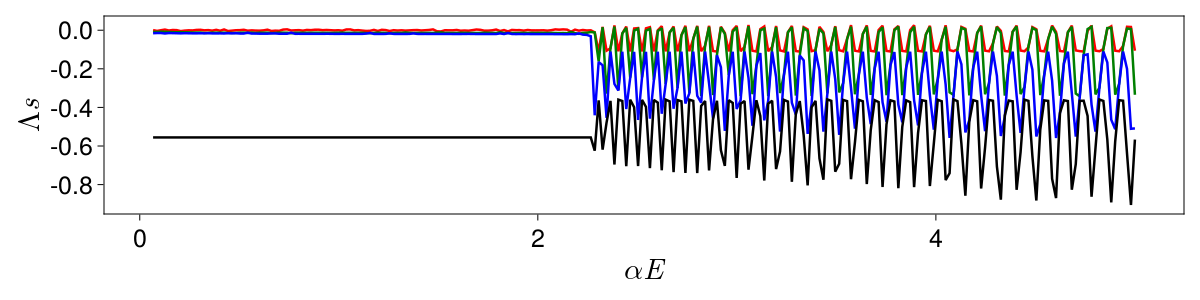

In [22]:
lb_size = 30; tck_size = 25;

f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"αE", ylabel = L"\Lambda s",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, αE_range, Λs[:, 1], linewidth = 2.5, color = :red)
lines!(axis, αE_range, Λs[:, 2], linewidth = 2.5, color = :green)
lines!(axis, αE_range, Λs[:, 3], linewidth = 2.5, color = :blue)
lines!(axis, αE_range, Λs[:, 4], linewidth = 2.5, color = :black)
f